### importing the libraries we need

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# changing the columns display option for pandas dataframe
pd.options.display.max_columns=100

### installing Coimetrics api client package for retrieving on-chain and off-chain data

In [ ]:
# installing the client package for coinmetrics (off-chain and on-chain data)
!pip install coinmetrics-api-client 

In [ ]:
# importing CoinMetricsClient Method
from coinmetrics.api_client import CoinMetricsClient

# initializing the client 
client = CoinMetricsClient()

In [ ]:
# retrieving off-chain data from coinmetrics using their API
btc_off_chain = pd.DataFrame(client.get_market_candles(markets='coinbase-btc-usd-spot'))

In [ ]:
btc_off_chain.head()

market                            time price_open  \
0  coinbase-btc-usd-spot  2019-08-09T00:00:00.000000000Z   11982.39   
1  coinbase-btc-usd-spot  2019-08-10T00:00:00.000000000Z   11860.62   
2  coinbase-btc-usd-spot  2019-08-11T00:00:00.000000000Z   11280.95   
3  coinbase-btc-usd-spot  2019-08-12T00:00:00.000000000Z   11540.76   
4  coinbase-btc-usd-spot  2019-08-13T00:00:00.000000000Z   11389.25   

  price_close price_high price_low               vwap          volume  \
0    11858.05      12040  11651.89  11827.71145005628  11774.51896894   
1    11280.95   11969.99     11170  11461.43939467827  13852.24742434   
2    11540.76      11585  11088.88  11371.13793572896   7329.58936485   
3    11389.28   11555.55   11222.4  11386.36760020021   6095.28181493   
4    10854.92   11438.39     10746  11011.90367204136  12500.34295603   

                    candle_usd_volume candle_trades_count  
0  139265612.827836553100003197633972               67149  
1  158766694.334161049000101175721011               67395  
2   83345771.679961370999997301162608               45121  
3   69403119.371608504200001202765129               43093  
4  137652572.499283131200017036577043               67721

### data cleaning and EDA

In [ ]:
# checking data types
btc_off_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   market               2711 non-null   object
 1   time                 2711 non-null   object
 2   price_open           2711 non-null   object
 3   price_close          2711 non-null   object
 4   price_high           2711 non-null   object
 5   price_low            2711 non-null   object
 6   vwap                 2711 non-null   object
 7   volume               2711 non-null   object
 8   candle_usd_volume    2711 non-null   object
 9   candle_trades_count  2711 non-null   object
dtypes: object(10)
memory usage: 211.9+ KB


In [ ]:
# first we can drop the column 'market'
btc_off_chain.drop('market',axis=1,inplace=True)

In [ ]:
# convert time column into datetime
btc_off_chain['time'] = pd.to_datetime(btc_off_chain['time'])

In [ ]:
# convert other columns in float 32
for column in btc_off_chain.columns:
  if column != 'time':
    btc_off_chain[column]=btc_off_chain[column].astype(dtype='float32')

In [ ]:
#sorting the dataframe according to time column
btc_off_chain.sort_values('time',inplace=True)

In [ ]:
# checking for missing values
btc_off_chain.isna().sum()

time                   0
price_open             0
price_close            0
price_high             0
price_low              0
vwap                   0
volume                 0
candle_usd_volume      0
candle_trades_count    0
dtype: int64

no missing values 

In [ ]:
# saving the on chain data
btc_off_chain.to_csv("btc_off_chain_coinbase.csv")

In [ ]:
# reading on-chain data that we got from "coinmetrics.io"
btc = pd.read_excel("Coin_Metrics_Network_Data.xlsx")

In [ ]:
btc.head()

Time  BTC / USD Denominated Closing Price  \
0  2009-01-03                                  NaN   
1  2009-01-04                                  NaN   
2  2009-01-05                                  NaN   
3  2009-01-06                                  NaN   
4  2009-01-07                                  NaN   

   BTC / Free Float Market Cap (USD)  BTC / Realized Market Cap (USD)  \
0                                NaN                              0.0   
1                                NaN                              0.0   
2                                NaN                              0.0   
3                                NaN                              0.0   
4                                NaN                              0.0   

   BTC / Free Float MVRV (Free Float Market Cap / Realized Market Cap)  \
0                                                NaN                     
1                                                NaN                     
2                                                NaN                     
3                                                NaN                     
4                                                NaN                     

   BTC / MVRV (Market Cap / Realized Market Cap)  BTC / 30 Day Volatility  \
0                                            NaN                      NaN   
1                                            NaN                      NaN   
2                                            NaN                      NaN   
3                                            NaN                      NaN   
4                                            NaN                      NaN   

   BTC / ROI, 30 Days  BTC / Coinbase Issuance (native units)  \
0                 NaN                                     NaN   
1                 NaN                                     NaN   
2                 NaN                                     NaN   
3                 NaN                                     NaN   
4                 NaN                                     NaN   

   BTC / Coinbase Issuance (USD)  BTC / 1 Day Active Supply  \
0                            NaN                        0.0   
1                            NaN                        0.0   
2                            NaN                        0.0   
3                            NaN                        0.0   
4                            NaN                        0.0   

   BTC / 7 Day Active Supply  BTC / 30 Day Active Supply  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   BTC / Value in Top 100 Addrs (native units)  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   BTC / NDF (Network Distribution Factor)  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   BTC / Val in Addrs w/ Bal ≥ 1M (native units)  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   BTC / Val in Addrs w/ Bal ≥ 100K (native units)  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                            

In [ ]:
#checking the variable types
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 33 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Time                                                                 4839 non-null   object 
 1   BTC / USD Denominated Closing Price                                  4275 non-null   float64
 2   BTC / Free Float Market Cap (USD)                                    4278 non-null   float64
 3   BTC / Realized Market Cap (USD)                                      4839 non-null   float64
 4   BTC / Free Float MVRV (Free Float Market Cap / Realized Market Cap)  4278 non-null   float64
 5   BTC / MVRV (Market Cap / Realized Market Cap)                        4278 non-null   float64
 6   BTC / 30 Day Volatility                                              4248 non-null   float64
 7   BTC / 

In [ ]:
# checking the Dataframe shape
btc.shape

(4839, 33)

4839 rows and 33 columns

In [ ]:
# converting Time column from object type to datetime
btc['Time'] = pd.to_datetime(btc['Time'],utc=True)

In [ ]:
# let's keep the data from 2010-07-18, because we can clearly see that nothing was recorded before
# BTC closing price wasn't recorded for april 2022 so we are going to set the last date for 2022-03-31
btc = btc[(btc['Time']>'2010-07-17') & (btc['Time']<'2022-03-31')]

In [ ]:
# checking for null values
btc.isna().sum()

Time                                                                    0
BTC / USD Denominated Closing Price                                     0
BTC / Free Float Market Cap (USD)                                       0
BTC / Realized Market Cap (USD)                                         0
BTC / Free Float MVRV (Free Float Market Cap / Realized Market Cap)     0
BTC / MVRV (Market Cap / Realized Market Cap)                           0
BTC / 30 Day Volatility                                                30
BTC / ROI, 30 Days                                                     30
BTC / Coinbase Issuance (native units)                                  0
BTC / Coinbase Issuance (USD)                                           0
BTC / 1 Day Active Supply                                               0
BTC / 7 Day Active Supply                                               0
BTC / 30 Day Active Supply                                              0
BTC / Value in Top 100 Addrs (native u

In [ ]:
# we still have missing values for 30 days moving average variables
# we are going to fill the gaps by propagating next valid observation
btc = btc.fillna(method='bfill')

now our data is clean with no missing values

In [ ]:
# let's merge on-chain and off-chain data

btc_merged = pd.merge(btc , btc_off_chain , left_on='Time' , right_on='time')

In [ ]:
# the BTC closing price is going to be our target, let's rename price_close column as BTC_price
btc_merged.rename(columns={'price_close':'BTC_price'},inplace=True)

In [ ]:
variables = ['BTC / Free Float Market Cap (USD)',
       'BTC / Realized Market Cap (USD)',
       'BTC / Free Float MVRV (Free Float Market Cap / Realized Market Cap)',
       'BTC / MVRV (Market Cap / Realized Market Cap)',
       'BTC / 30 Day Volatility', 'BTC / ROI, 30 Days',
       'BTC / Coinbase Issuance (native units)',
       'BTC / Coinbase Issuance (USD)', 'BTC / 1 Day Active Supply',
       'BTC / 7 Day Active Supply', 'BTC / 30 Day Active Supply',
       'BTC / Value in Top 100 Addrs (native units)',
       'BTC / NDF (Network Distribution Factor)',
       'BTC / Val in Addrs w/ Bal ≥ 1M (native units)',
       'BTC / Val in Addrs w/ Bal ≥ 100K (native units)',
       'BTC / Val in Addrs w/ Bal ≥ 10K (native units)',
       'BTC / Val in Addrs w/ Bal ≥ 1K (native units)',
       'BTC / Val in Addrs w/ Bal ≥ 100 (native units)',
       'BTC / Val in Addrs w/ Bal ≥ $10M USD',
       'BTC / Val in Addrs w/ Bal ≥ $1M USD', 'BTC / Tx Cnt',
       'BTC / Mean Tx Size (native units)',
       'BTC / Miner Revenue per Hash (USD)', 'BTC / Free Float NVT',
       'BTC / Exchange Deposits (USD)', 'BTC / NVT', 'BTC / Mean Hash Rate',
       'BTC / Difficulty', 'BTC / Exchange Withdrawals (USD)',
       'BTC / Daily Inflation Rate', 'BTC / Miner Revenue (USD)' , 'vwap', 'volume', 'candle_usd_volume',
       'candle_trades_count']

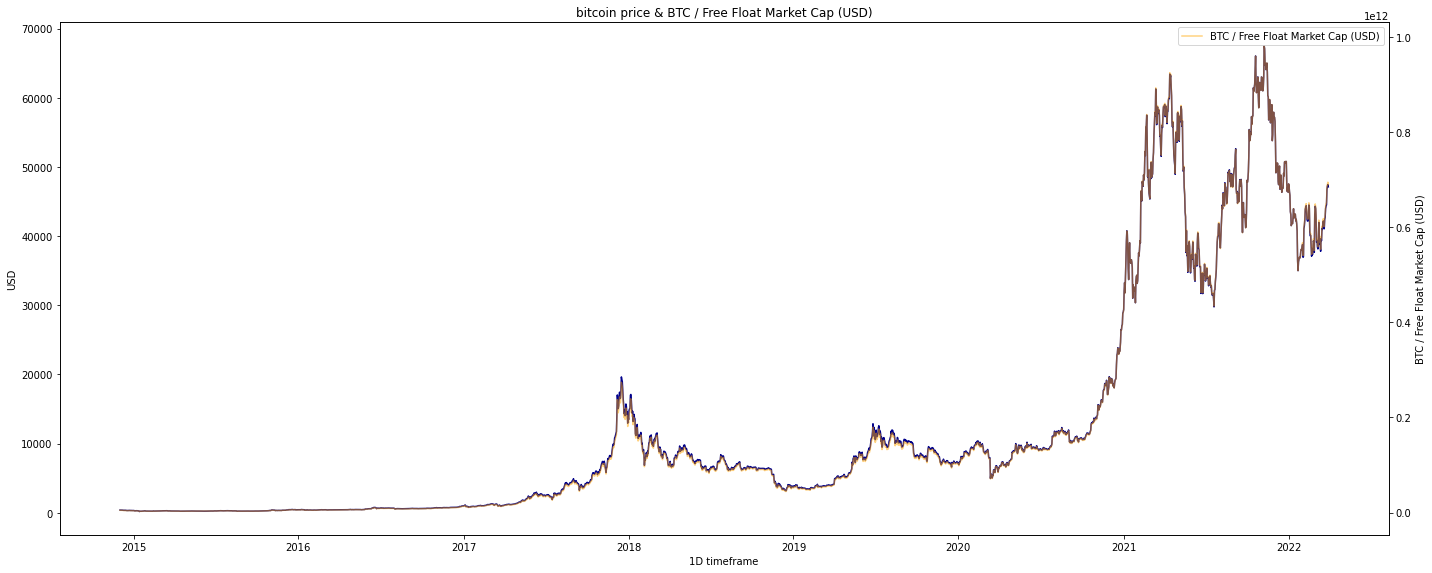

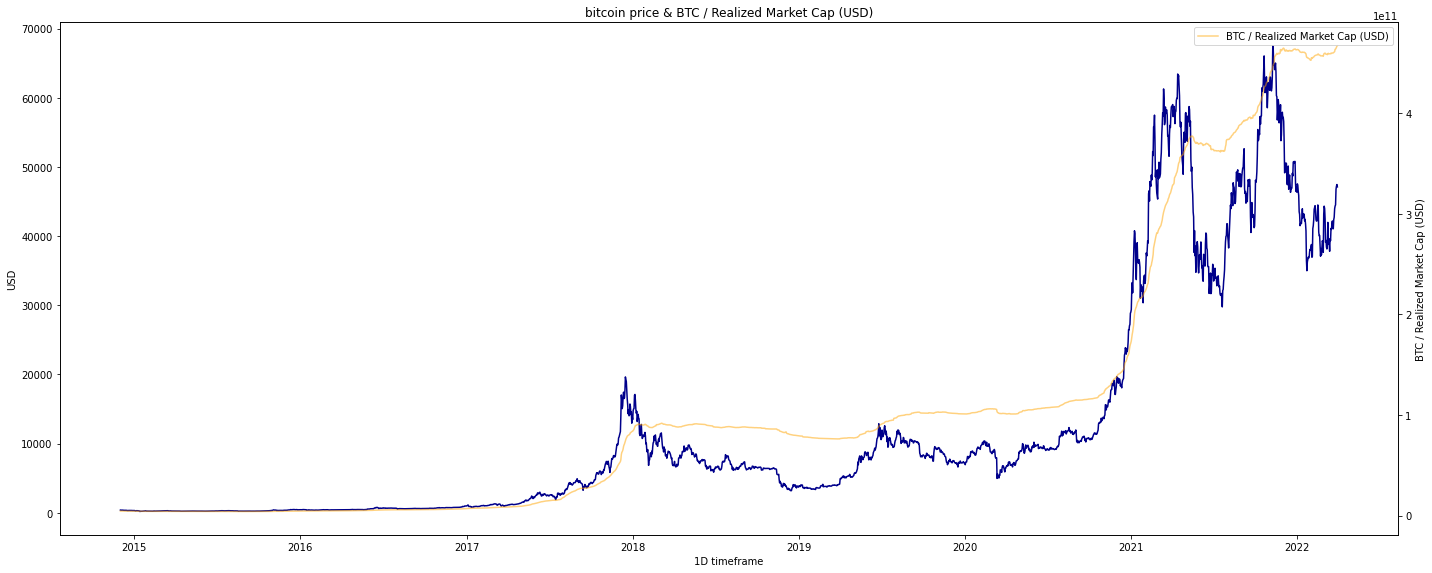

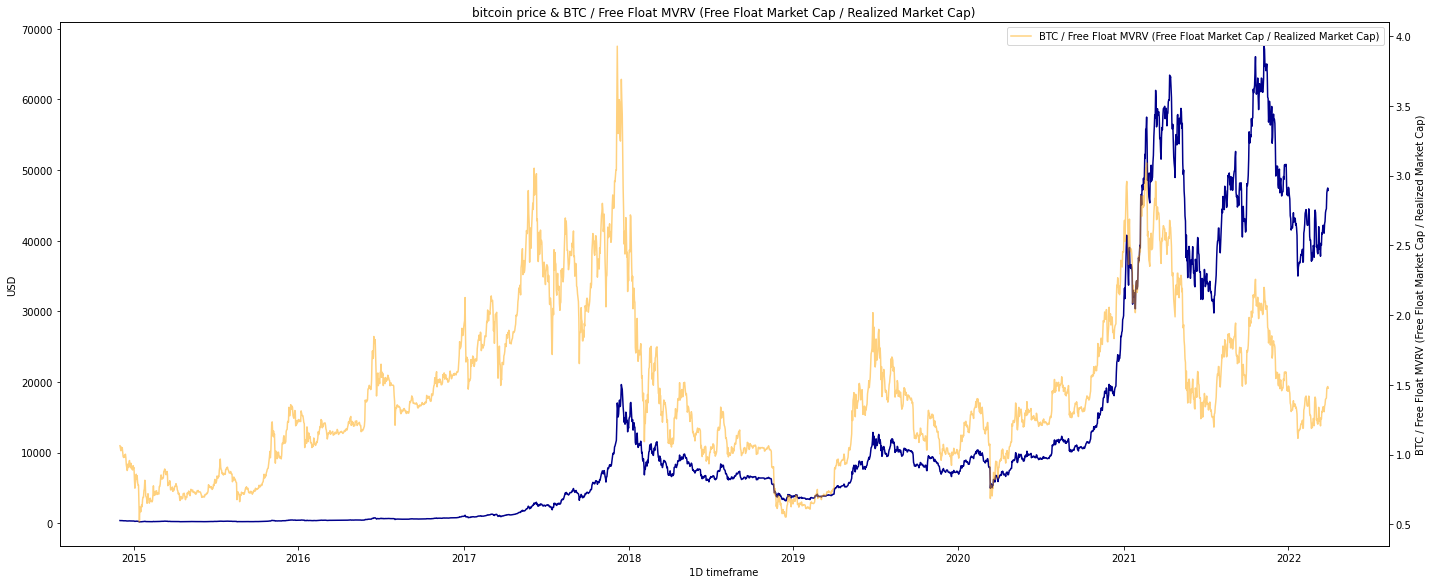

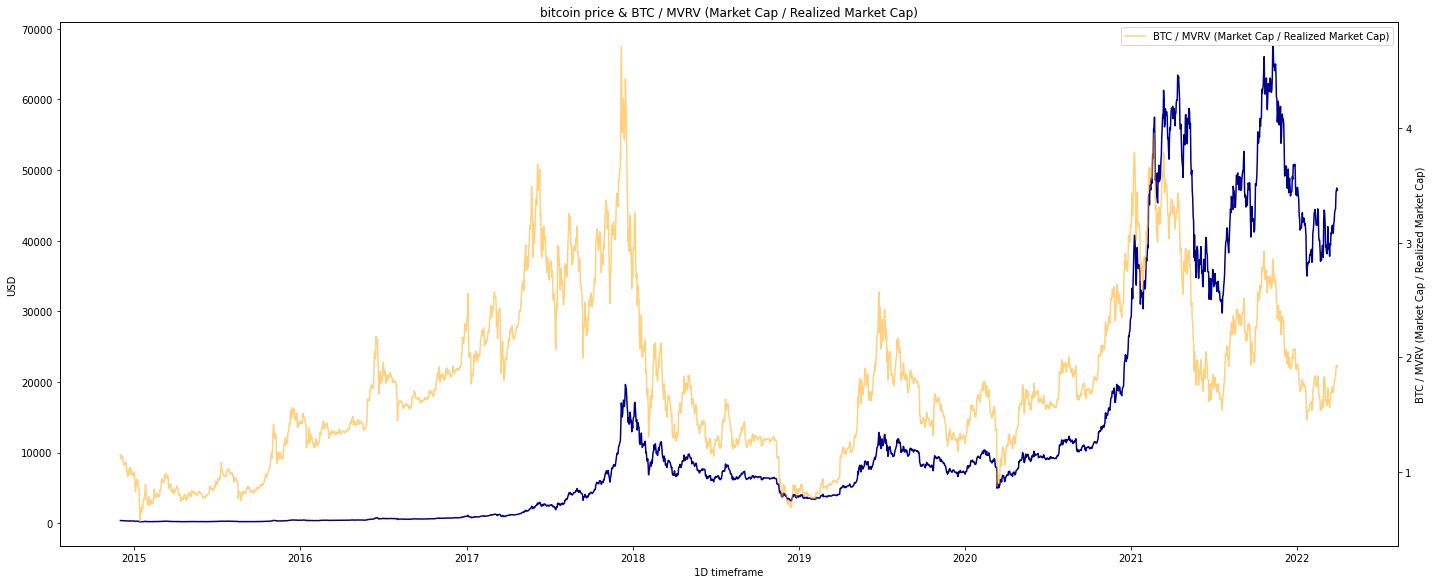

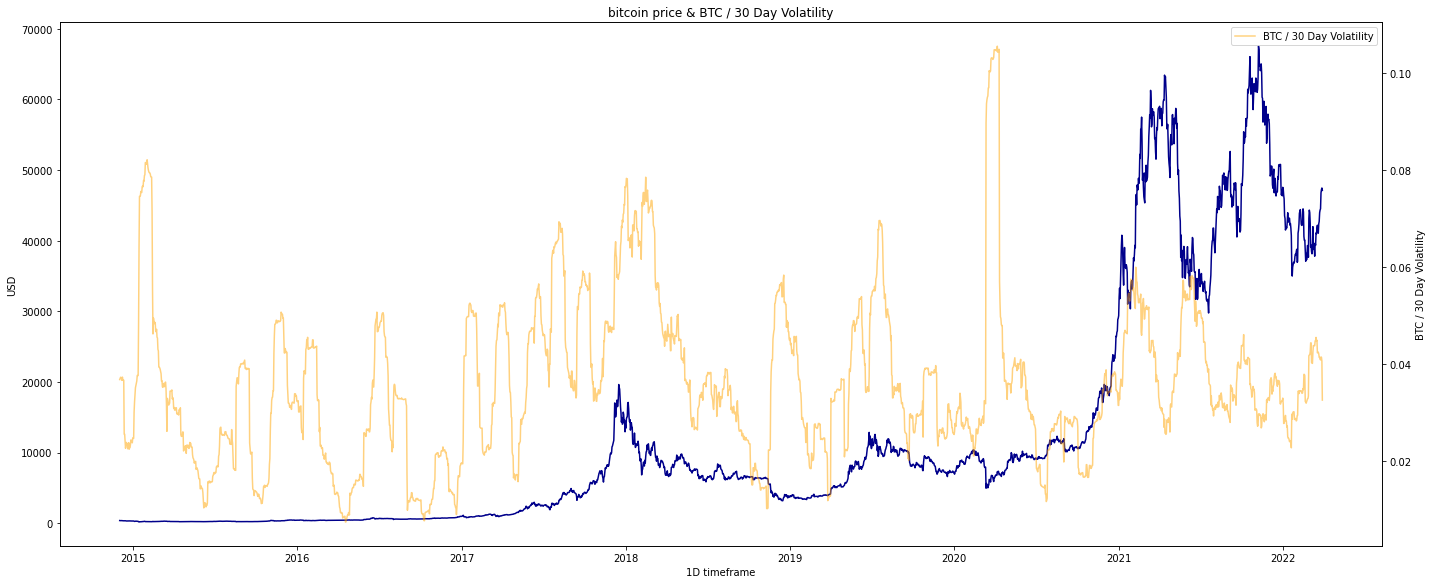

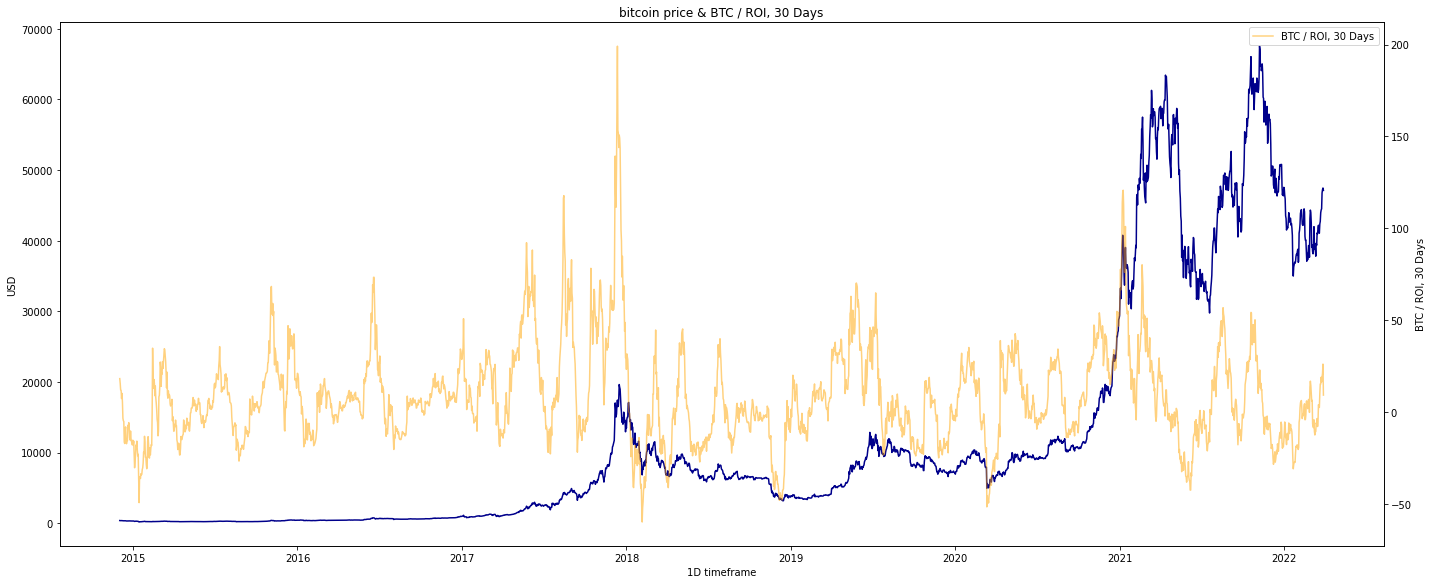

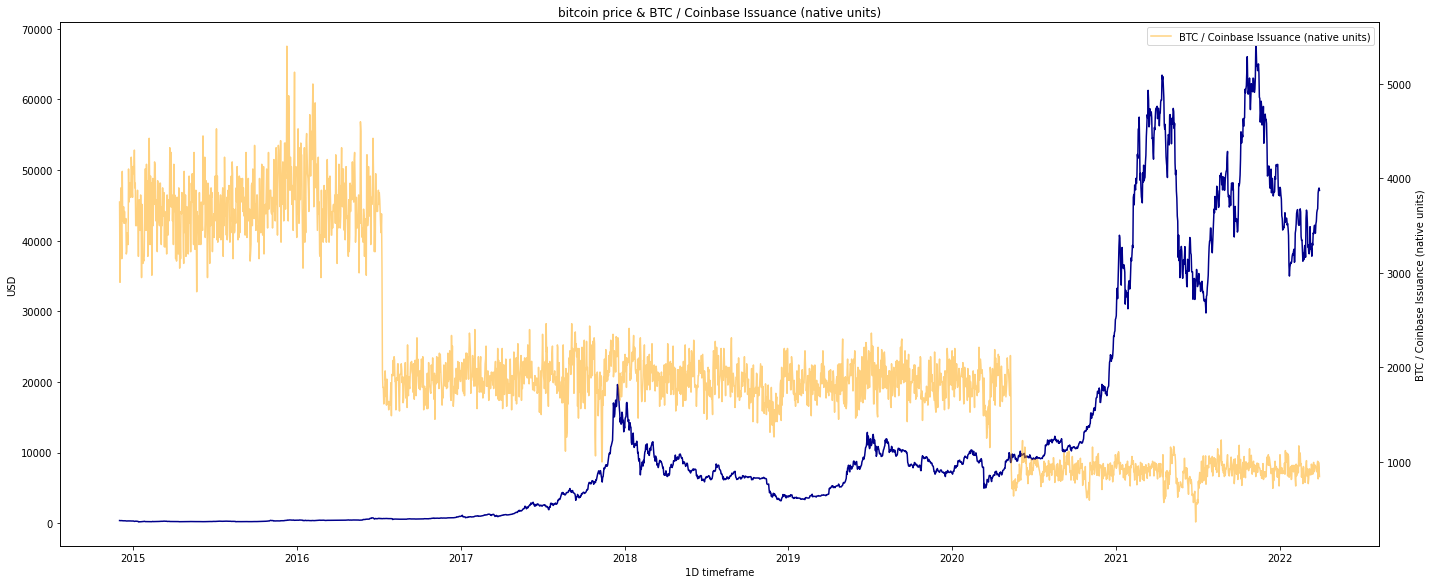

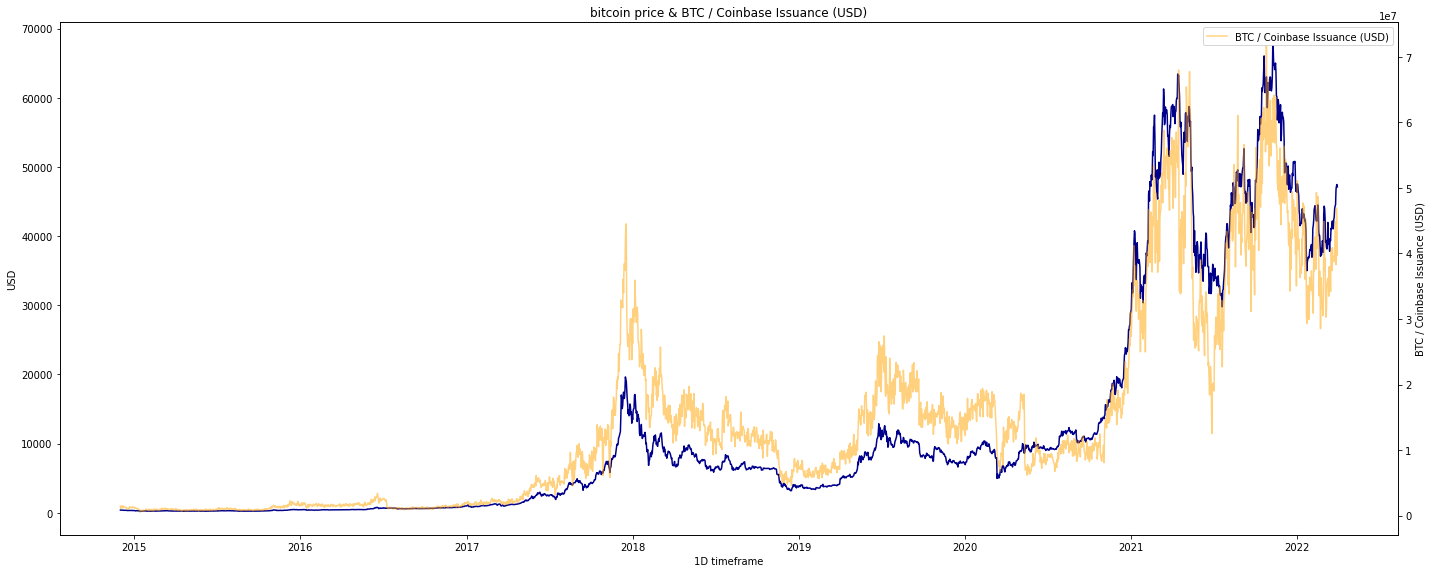

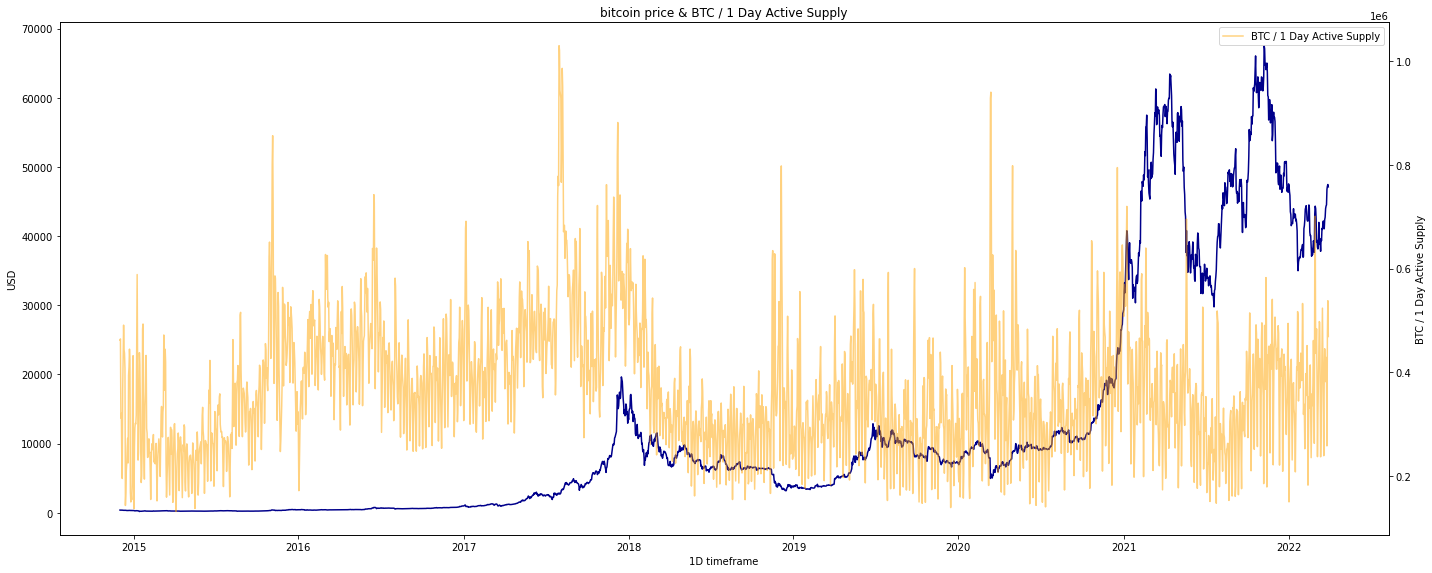

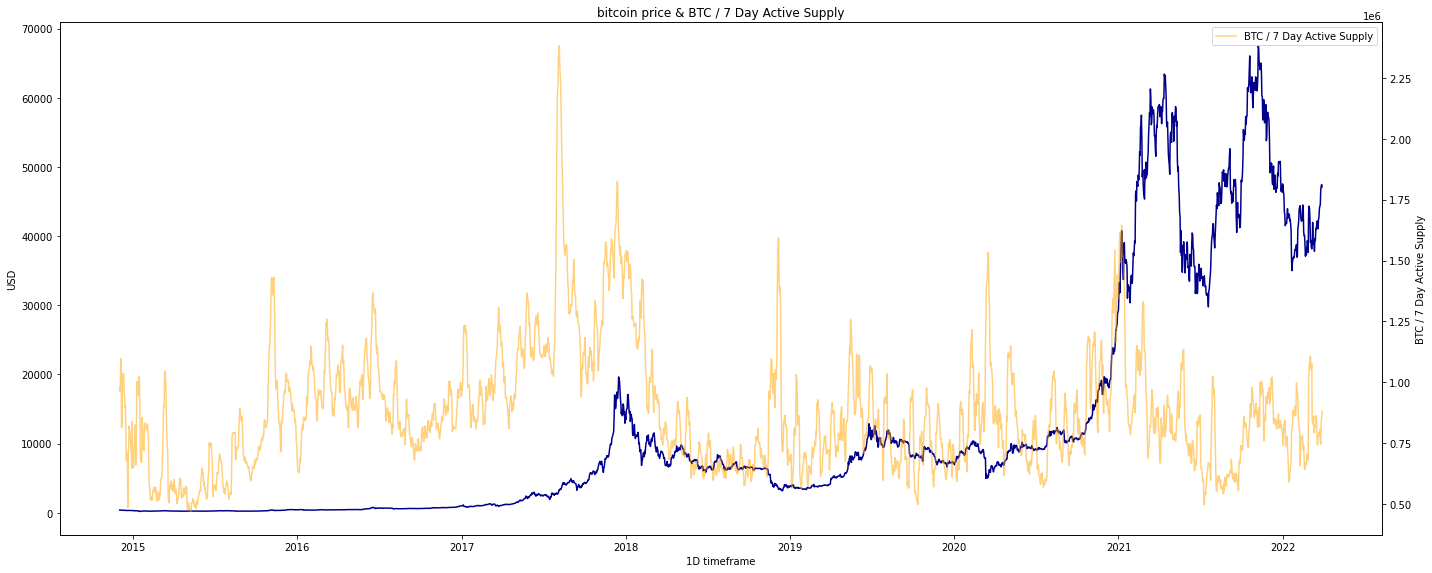

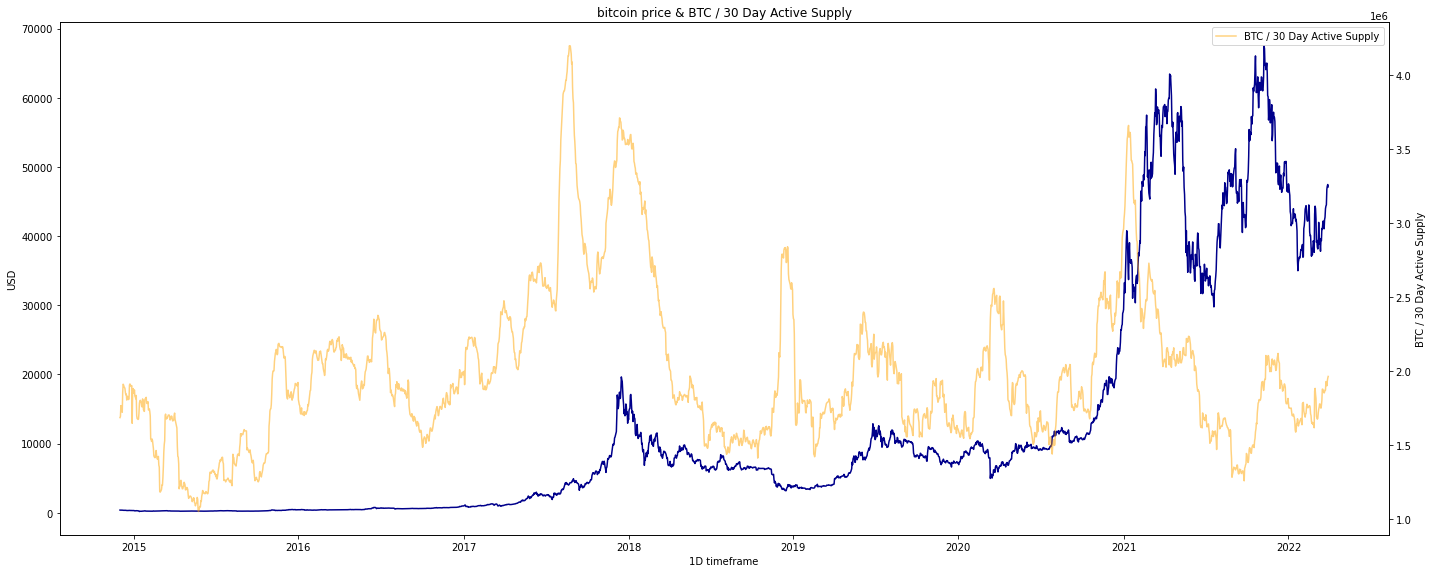

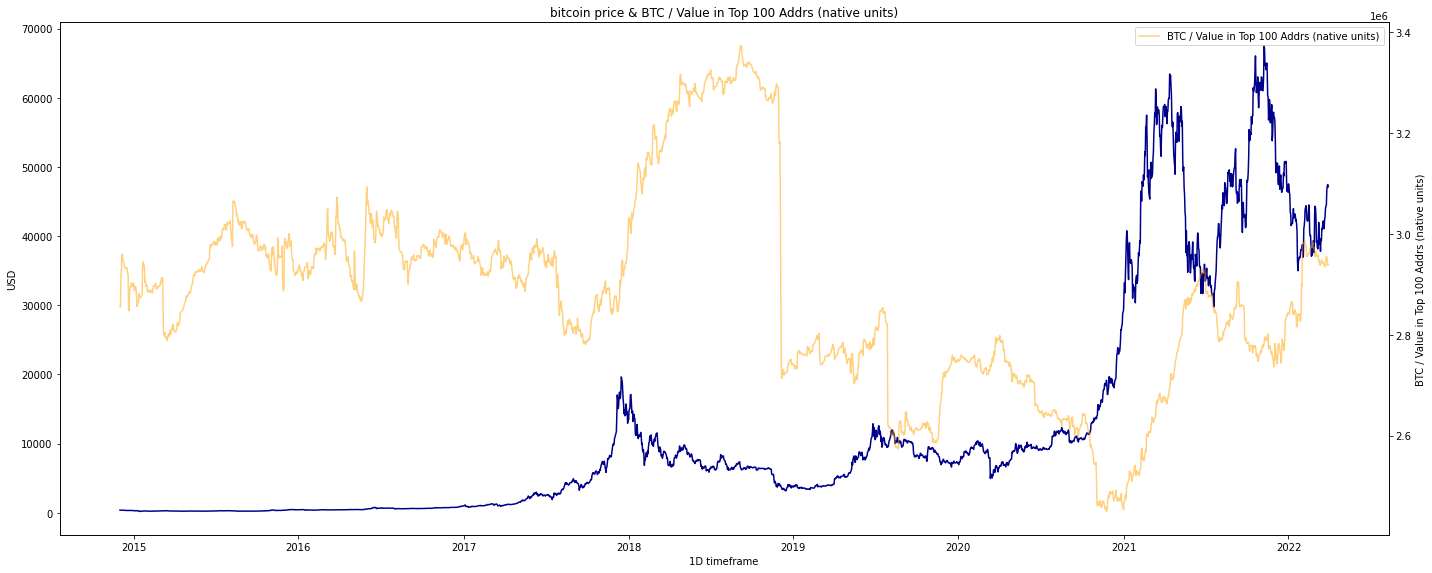

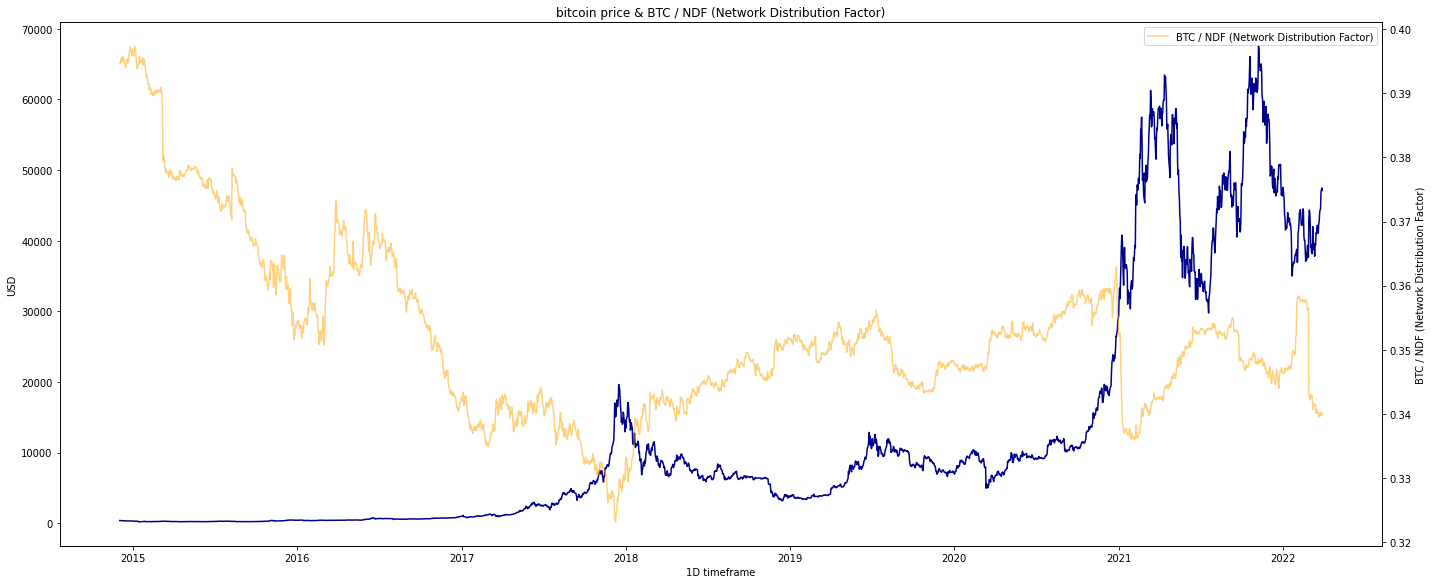

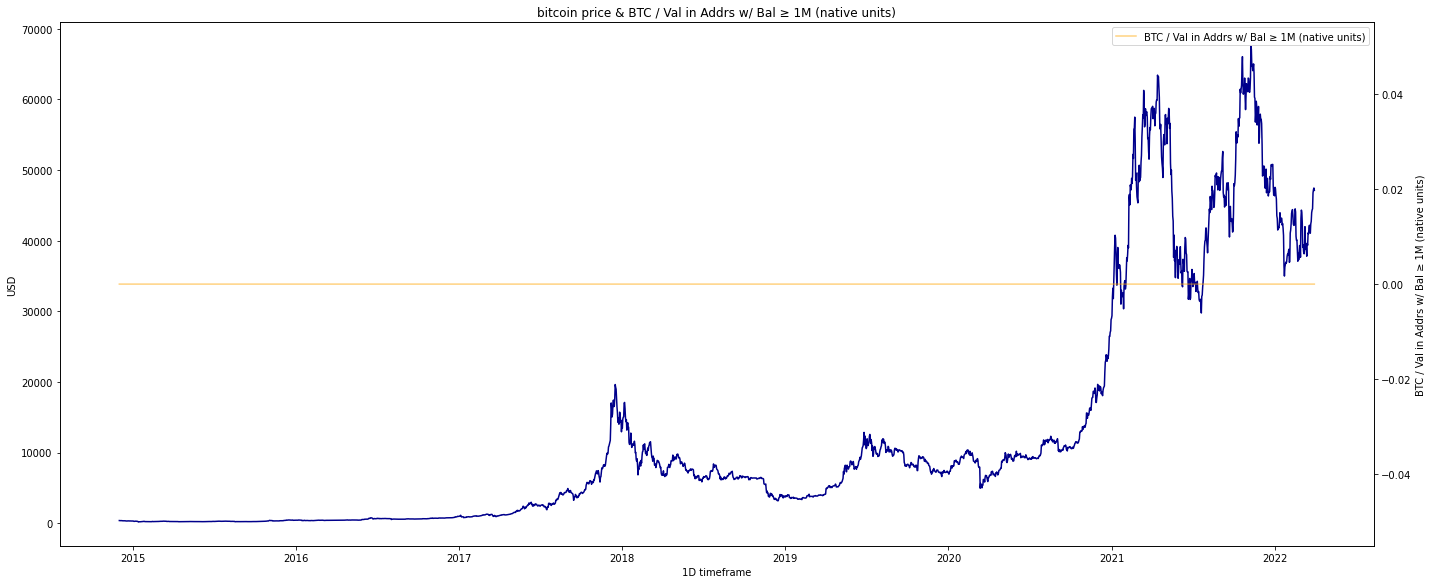

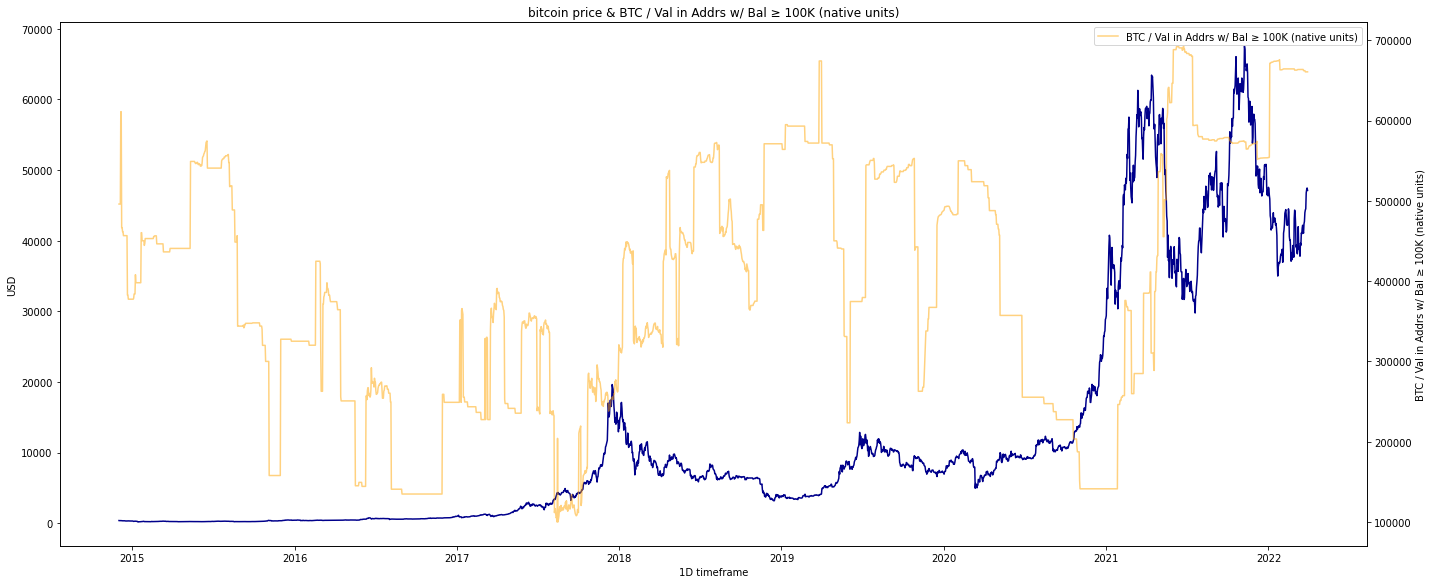

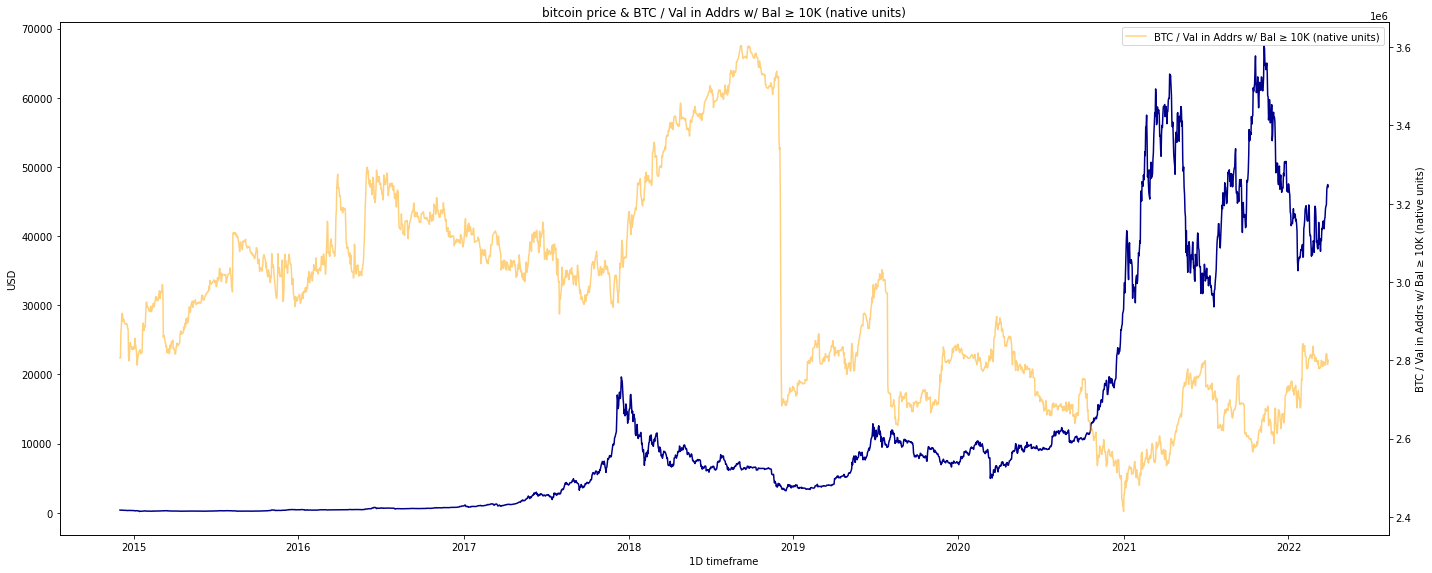

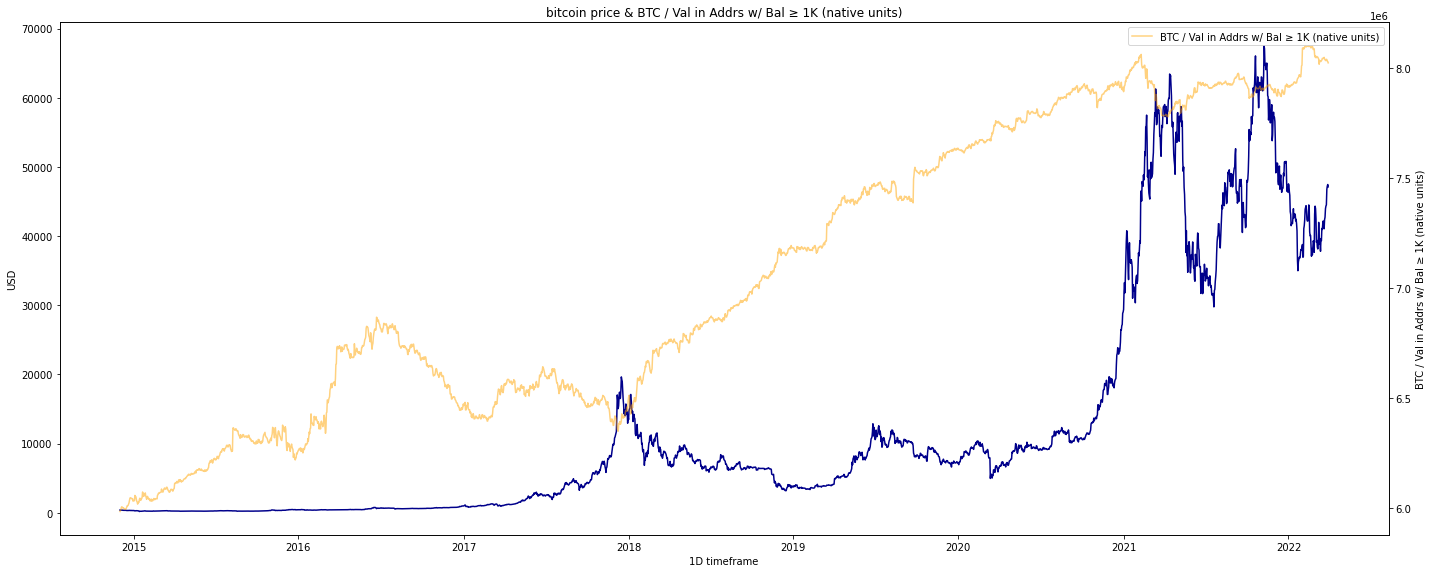

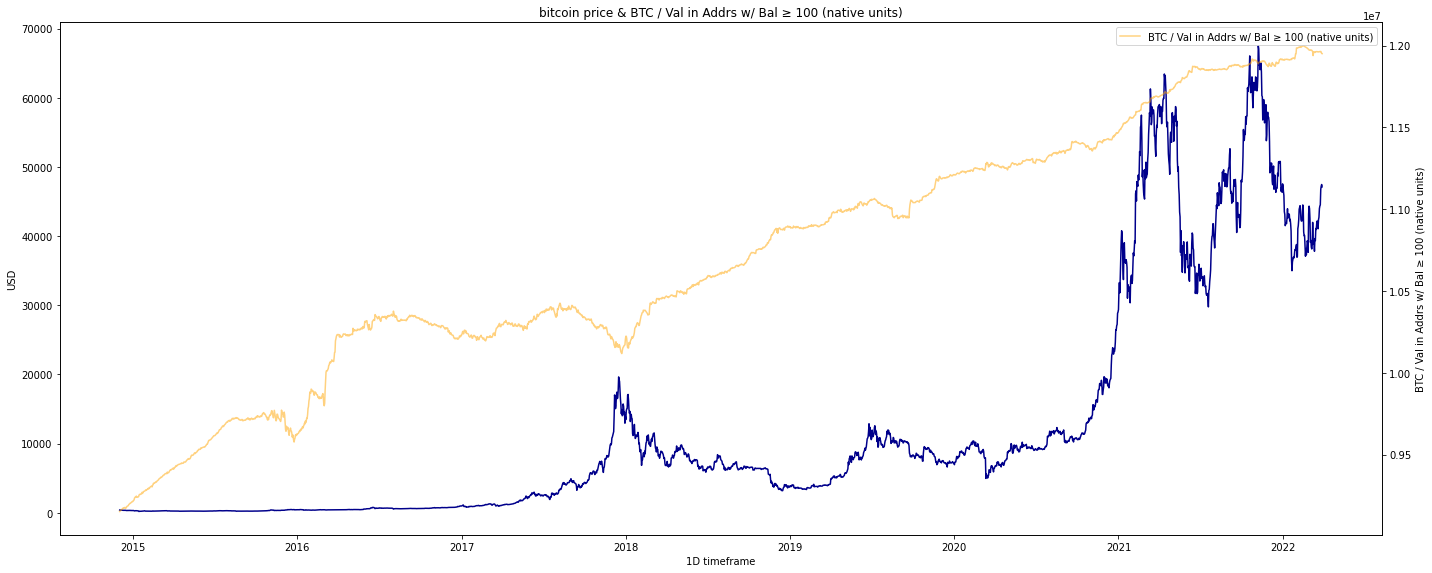

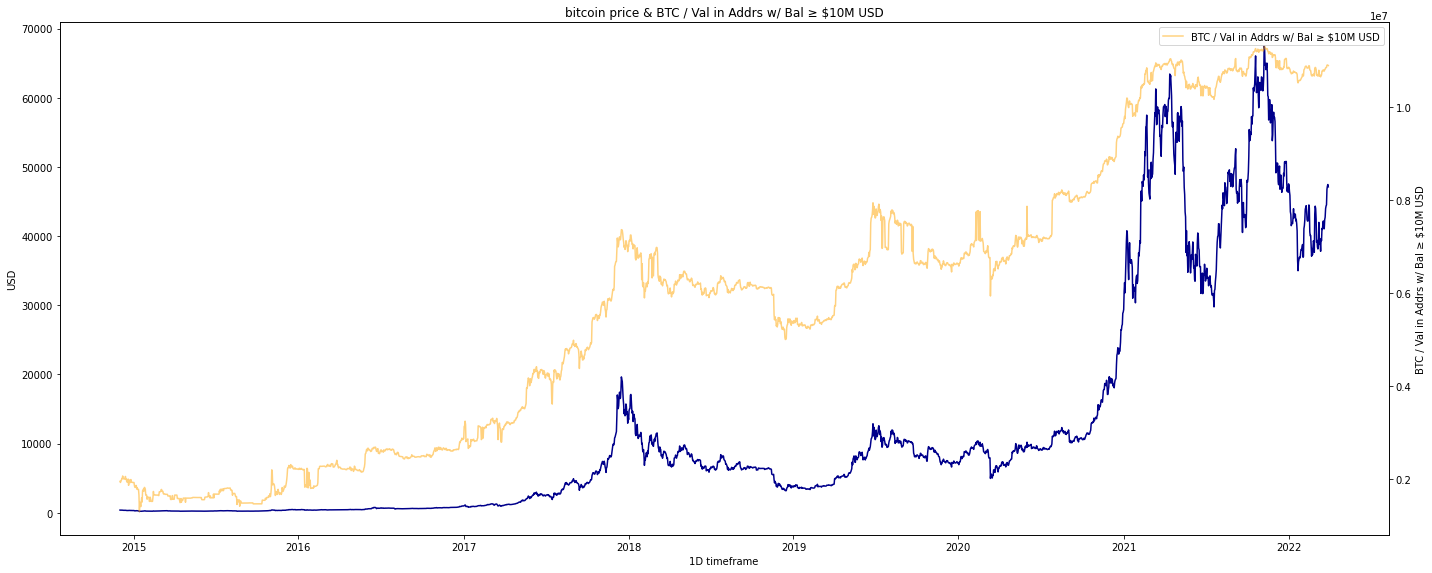

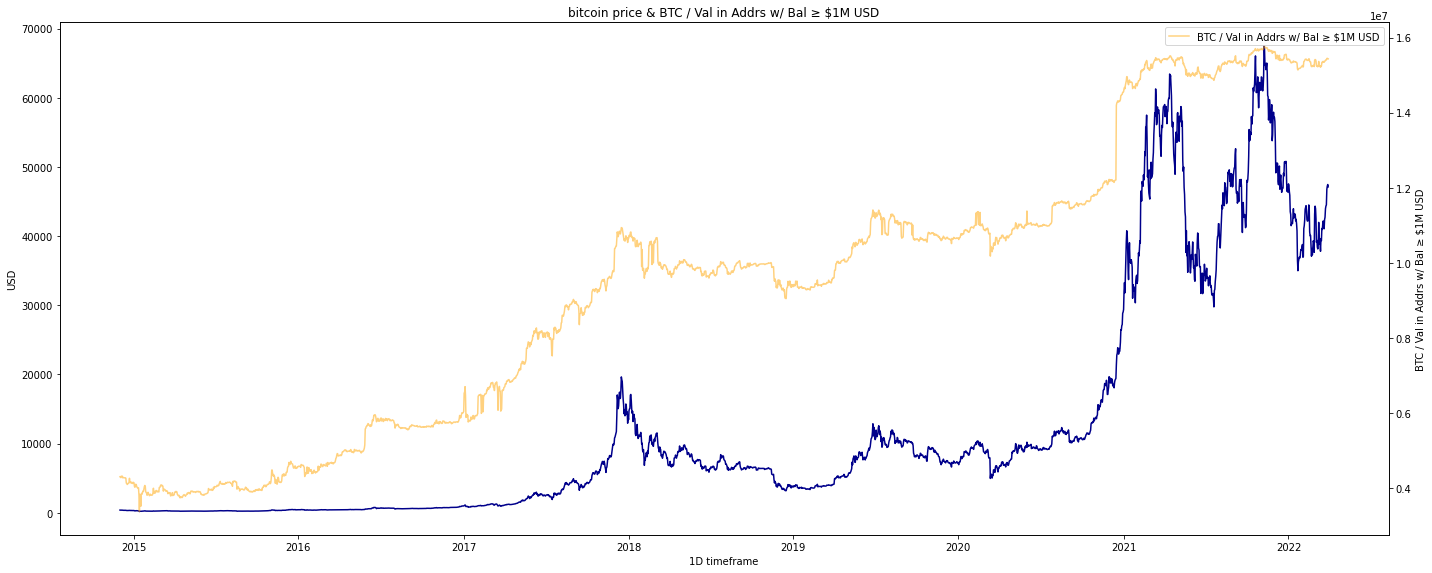

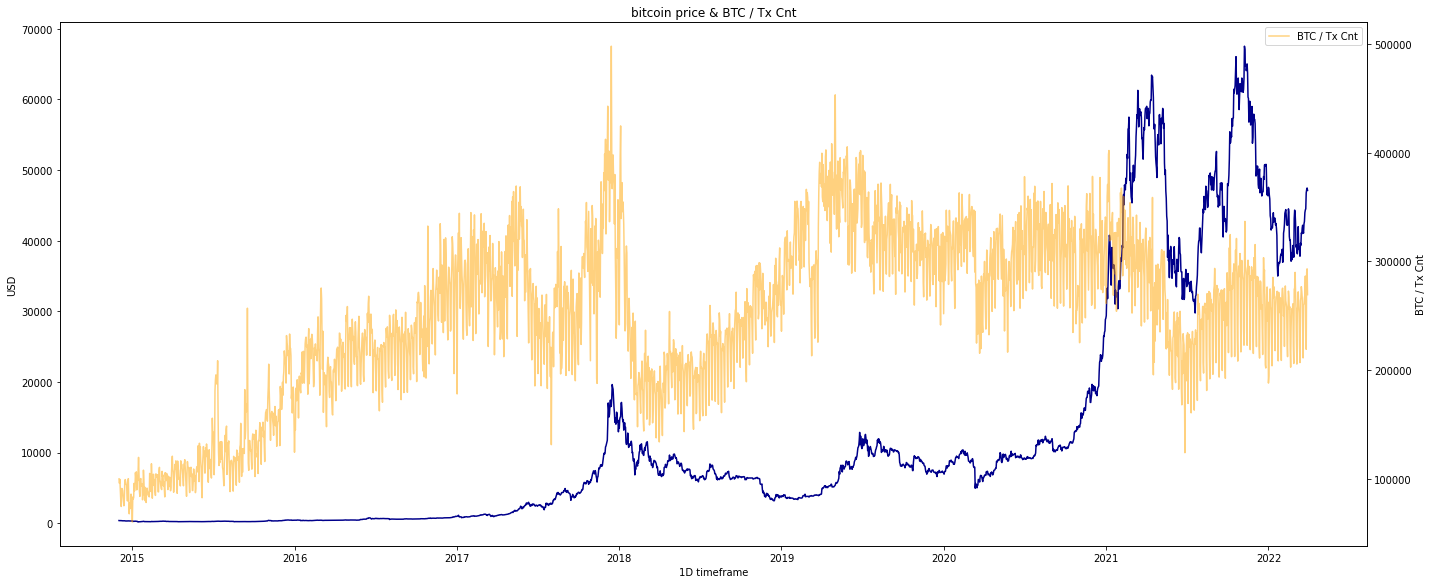

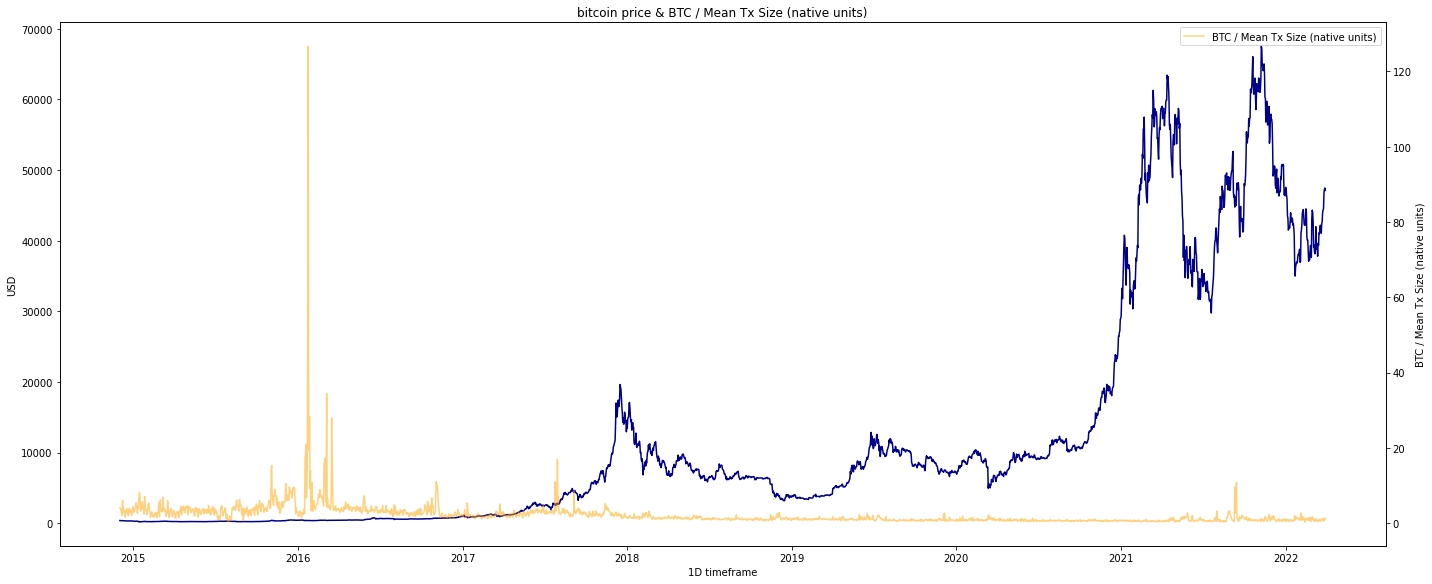

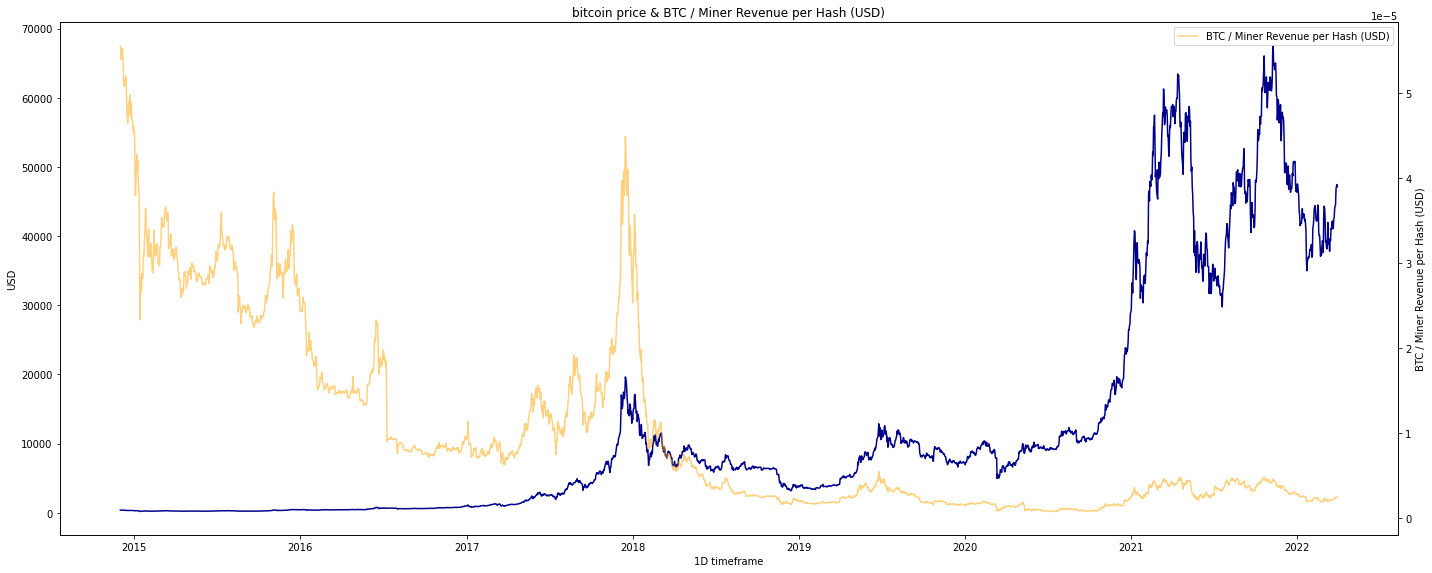

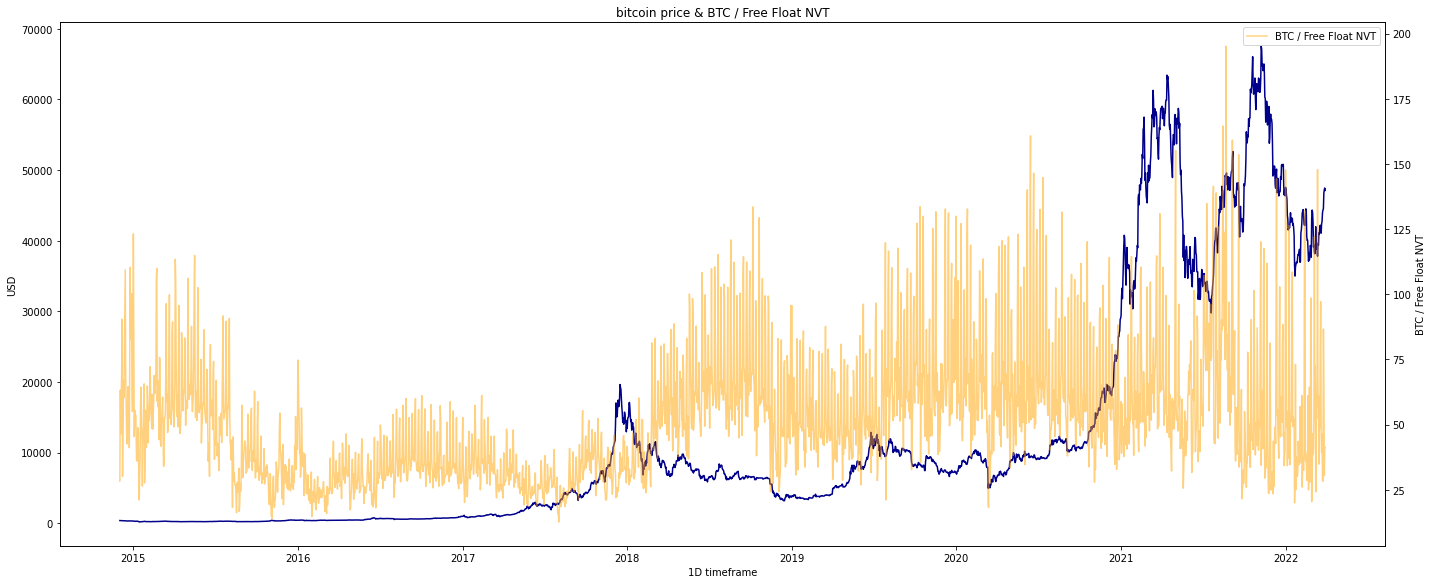

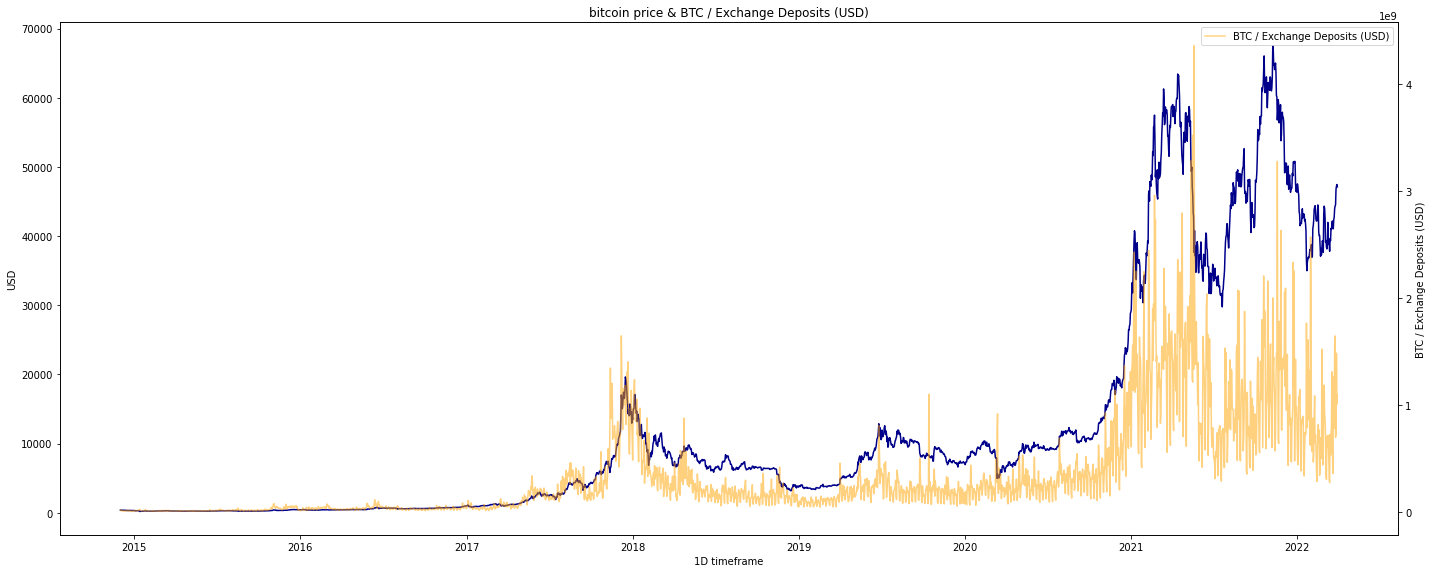

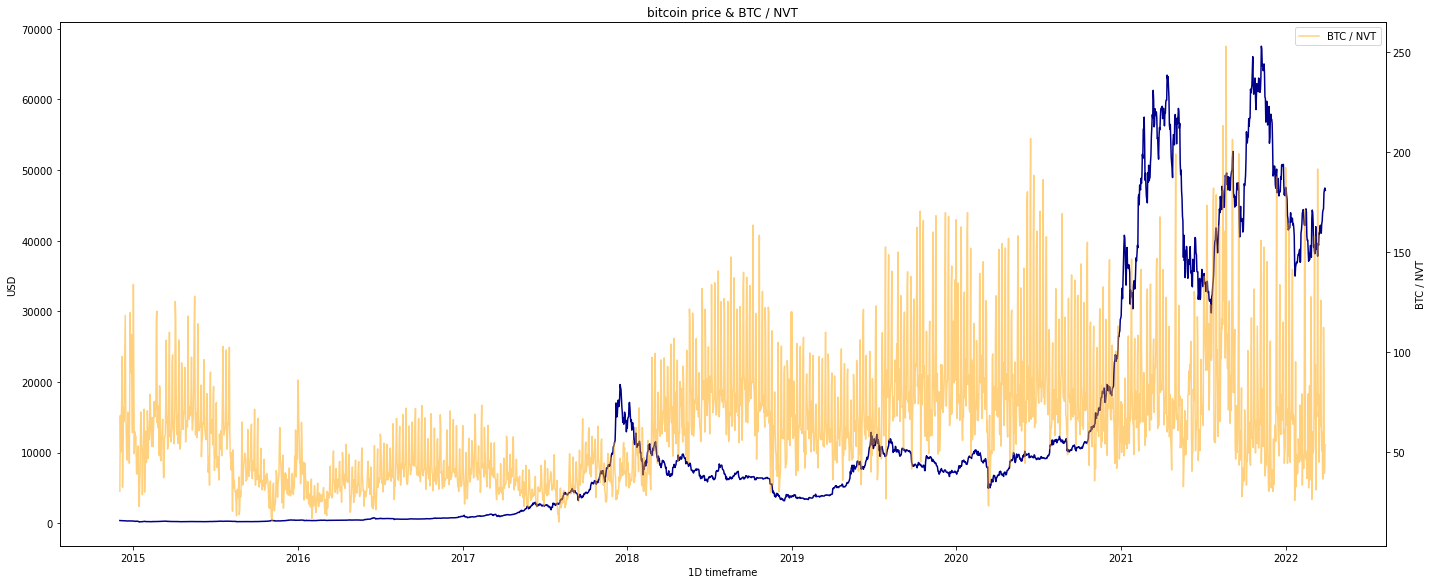

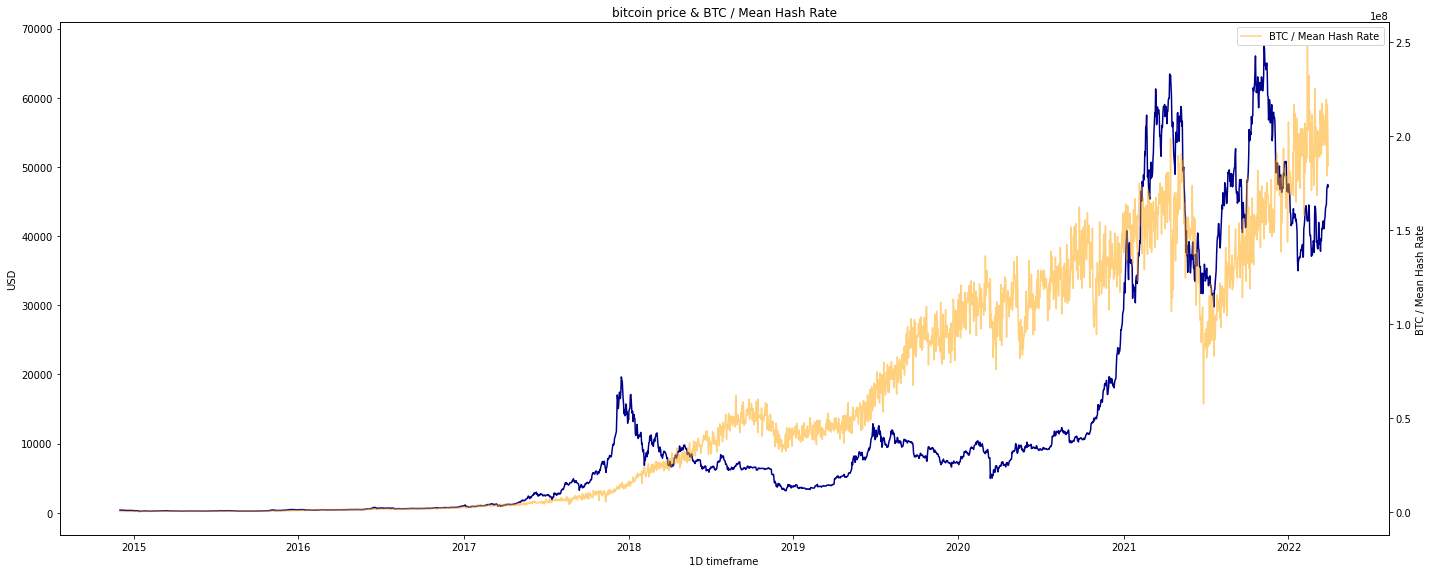

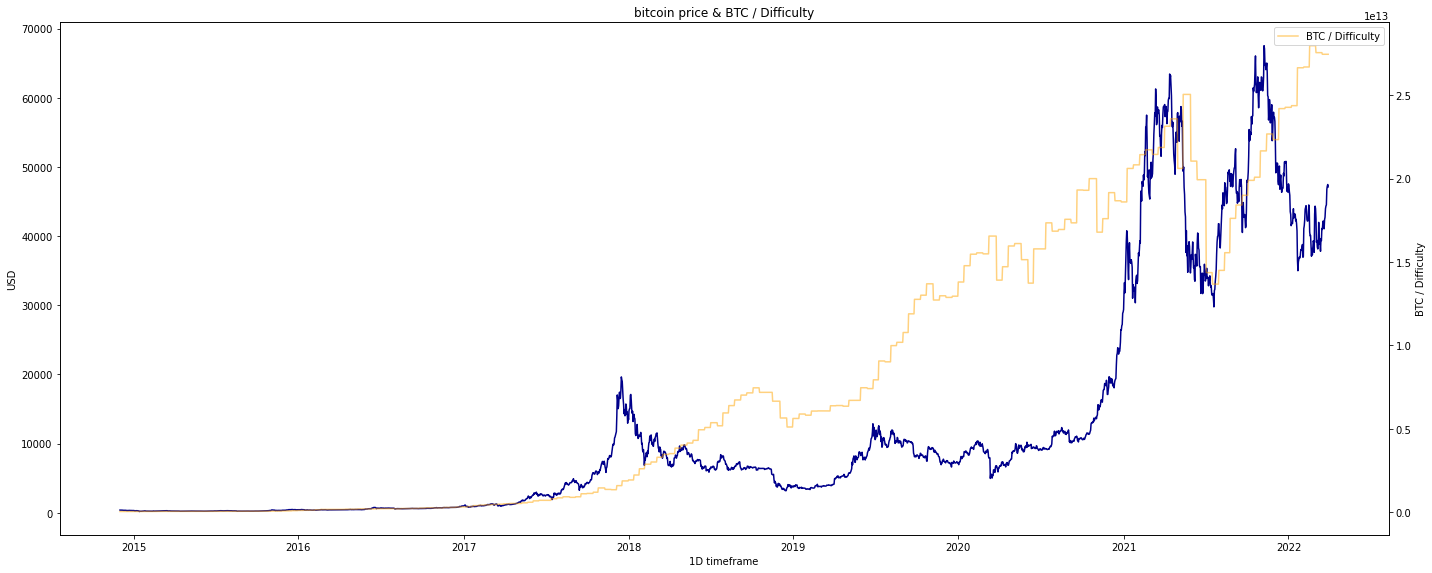

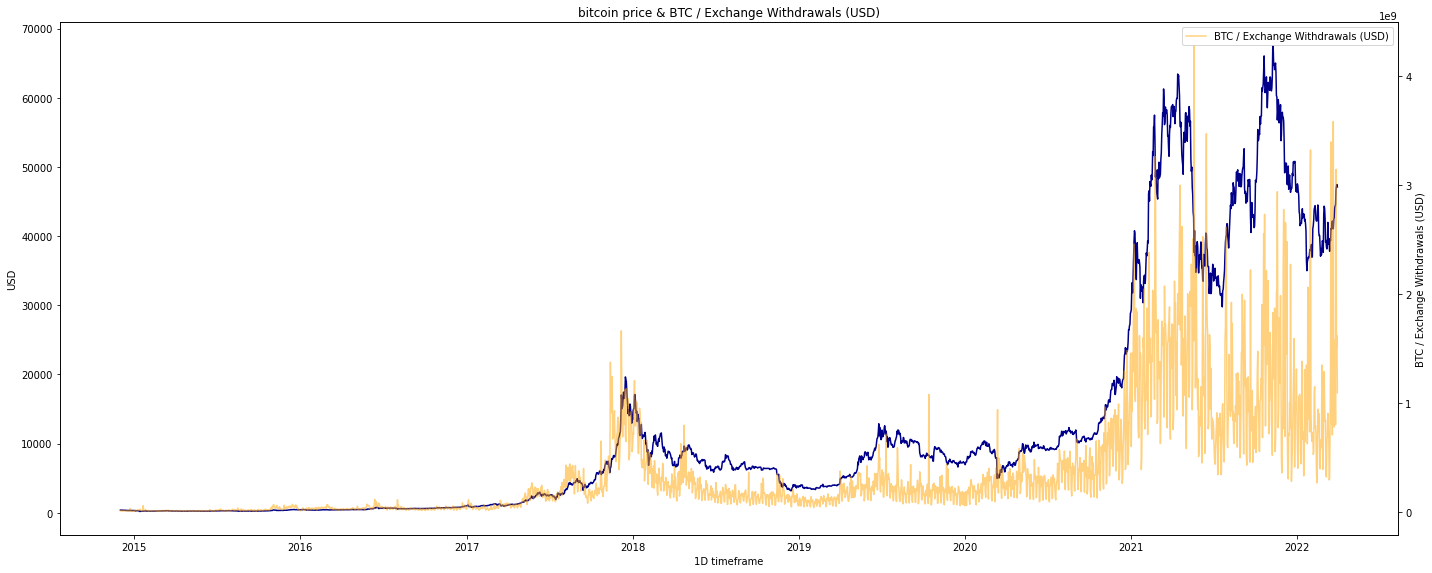

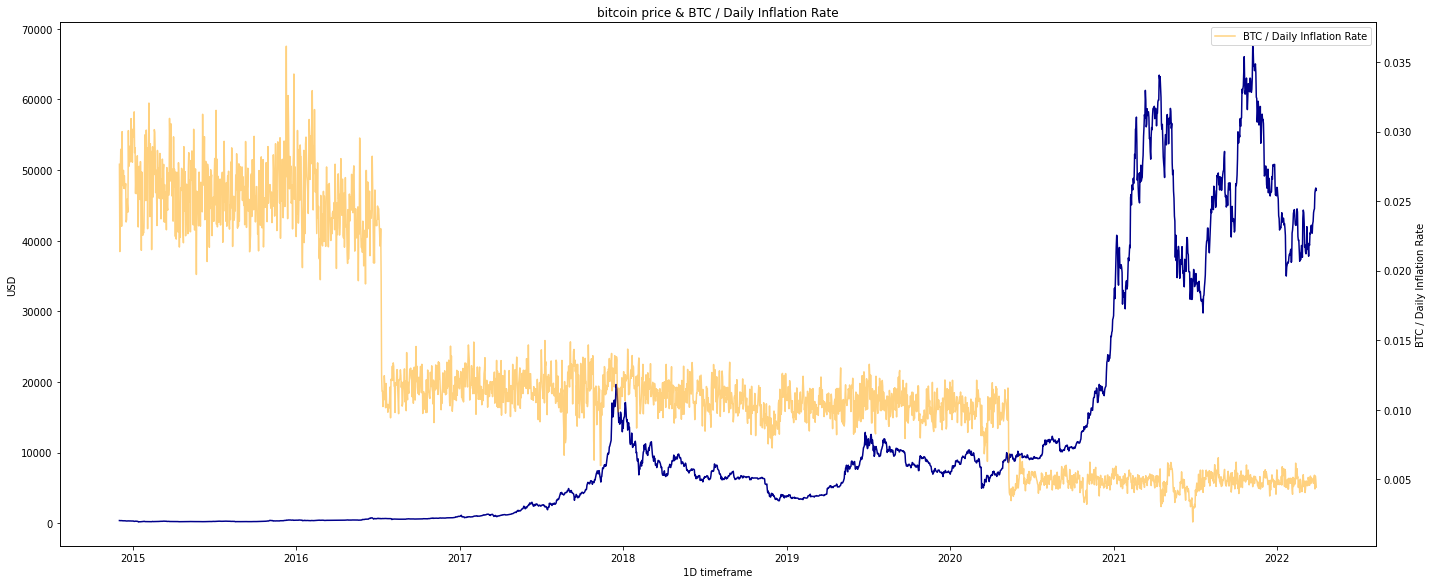

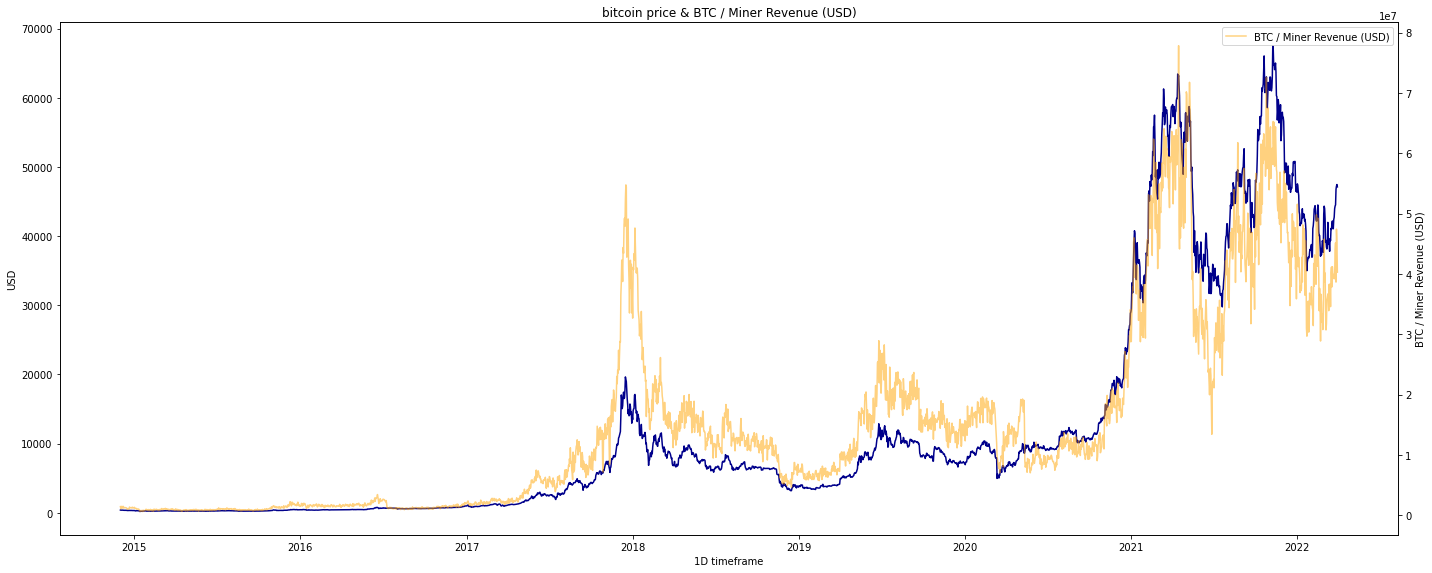

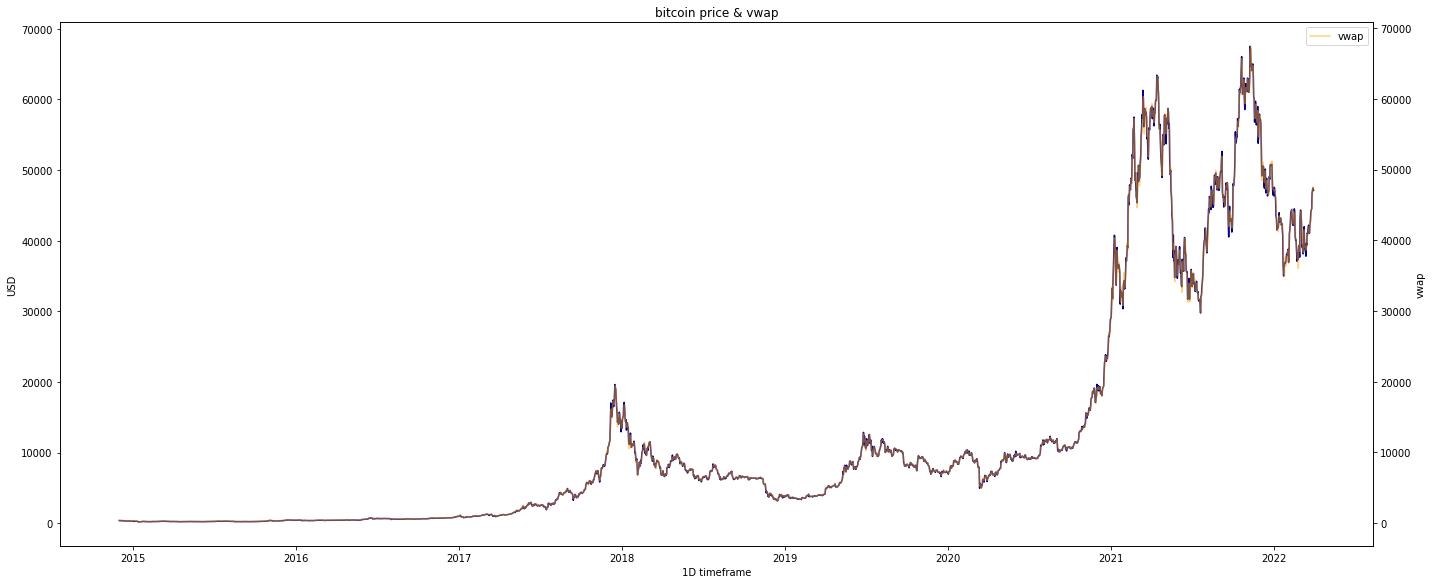

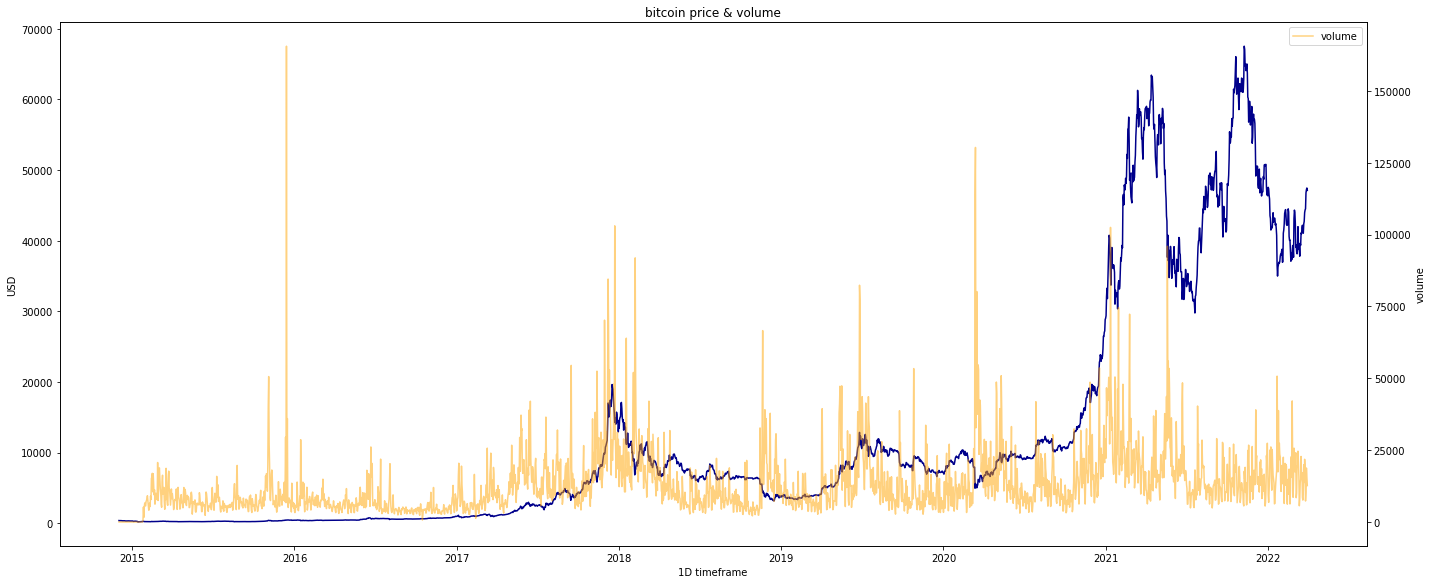

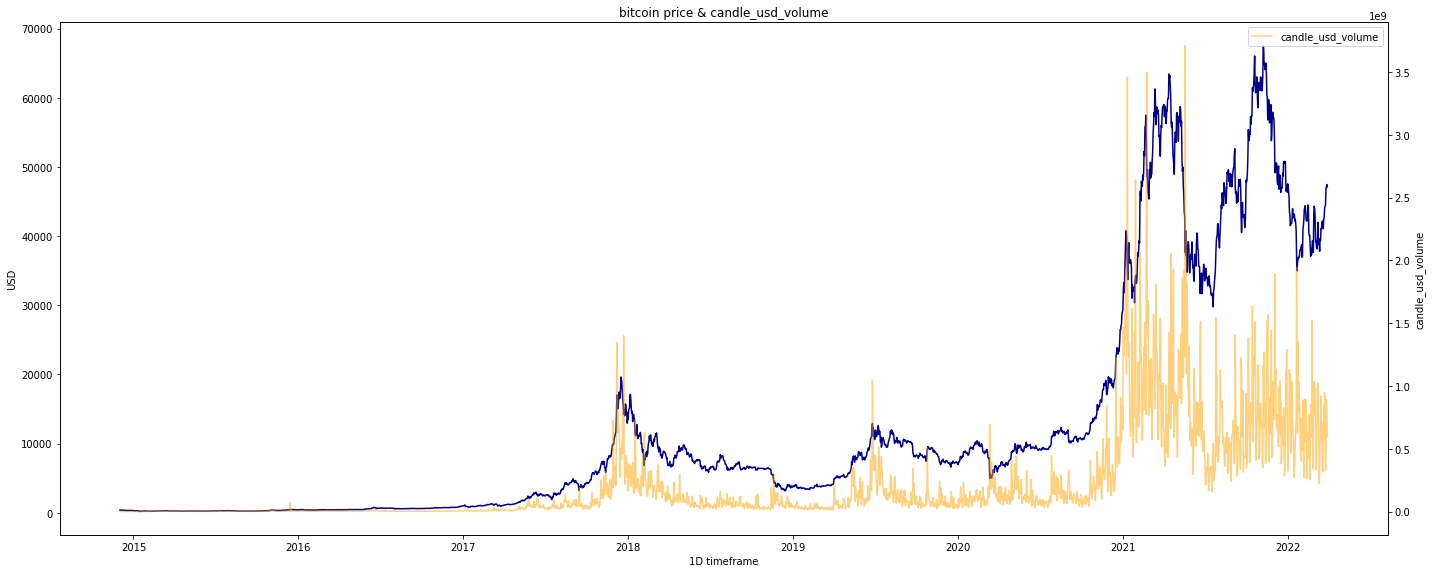

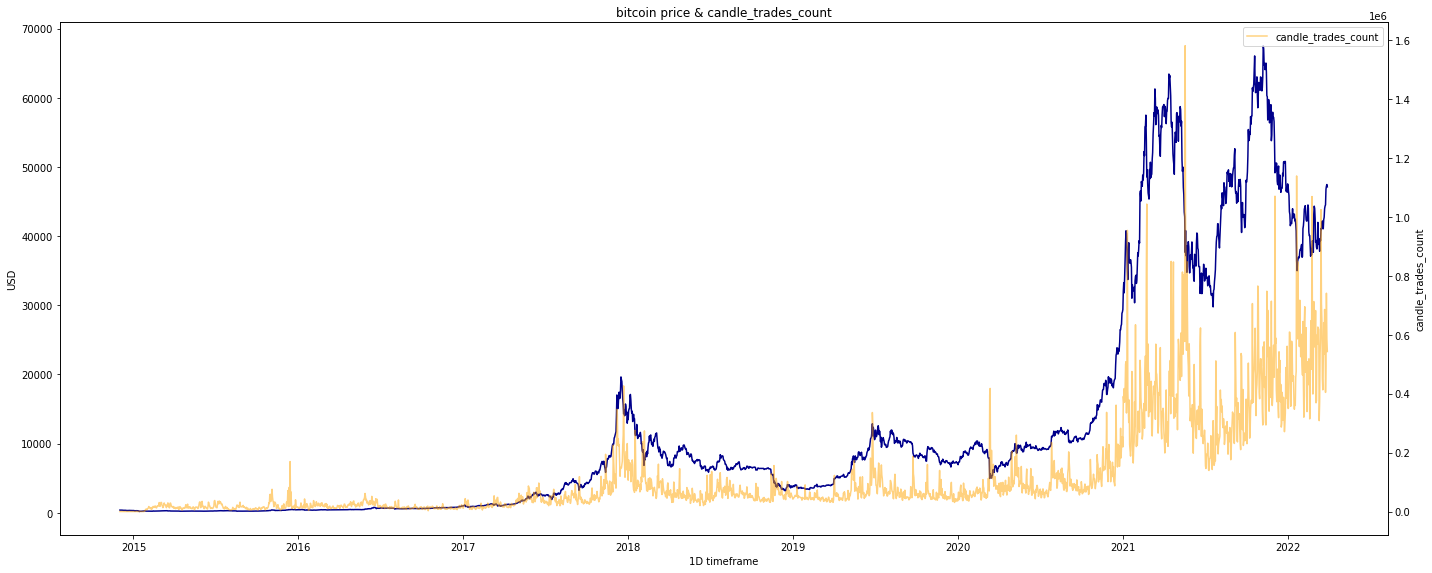

In [ ]:
# plotting price paired with each variable to try vizualize some patterns

for variable in variables:
    fig, ax1 = plt.subplots(figsize=(20,8))
    ax1.set_xlabel('1D timeframe')
    ax1.set_ylabel('USD')
    ax1.plot(btc_merged['time'], btc_merged['BTC / USD Denominated Closing Price'], color='darkblue',label='BTC price')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel(variable) 
    ax2.plot(btc_merged['time'], btc_merged[variable], color='orange', alpha=0.5,label=f'{variable}')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'bitcoin price & {variable}')
    plt.legend()
    plt.show()

In [ ]:
# dropping the following columns in the btc_merged dataframe:
# time (we have a duplicate after merging on time column)
# BTC / USD Denominated Closing Price (we're going to use the closing price (column BTC_price) from off-chain data as the target so we don't need this column anymore)
# free float market cap (giving the same information as bitcoin price)
# address with balance >= 1M native units (0 addresses for the whole period)
# vwap because it's overlaping perfectly with bitcoin price meaning that there is not added value in terms of information


columns_to_drop = ['time' , 'BTC / USD Denominated Closing Price' , 'BTC / Free Float Market Cap (USD)','vwap']

btc_merged.drop(columns_to_drop,axis=1,inplace=True)

### Feature engineering

In [ ]:
# lets create a feature showing the net exchange flows with the idea that if it's positive,
# that means more people are sending their bitcoins to exchanges to sell them which will create probably
# a selling pressure and could lead to a decrease in price. A negative net flow would mean a buying pressure thus
# a price increase

btc_merged['BTC / Exchange net flows (USD) '] = btc_merged['BTC / Exchange Deposits (USD)']-btc_merged['BTC / Exchange Withdrawals (USD)']

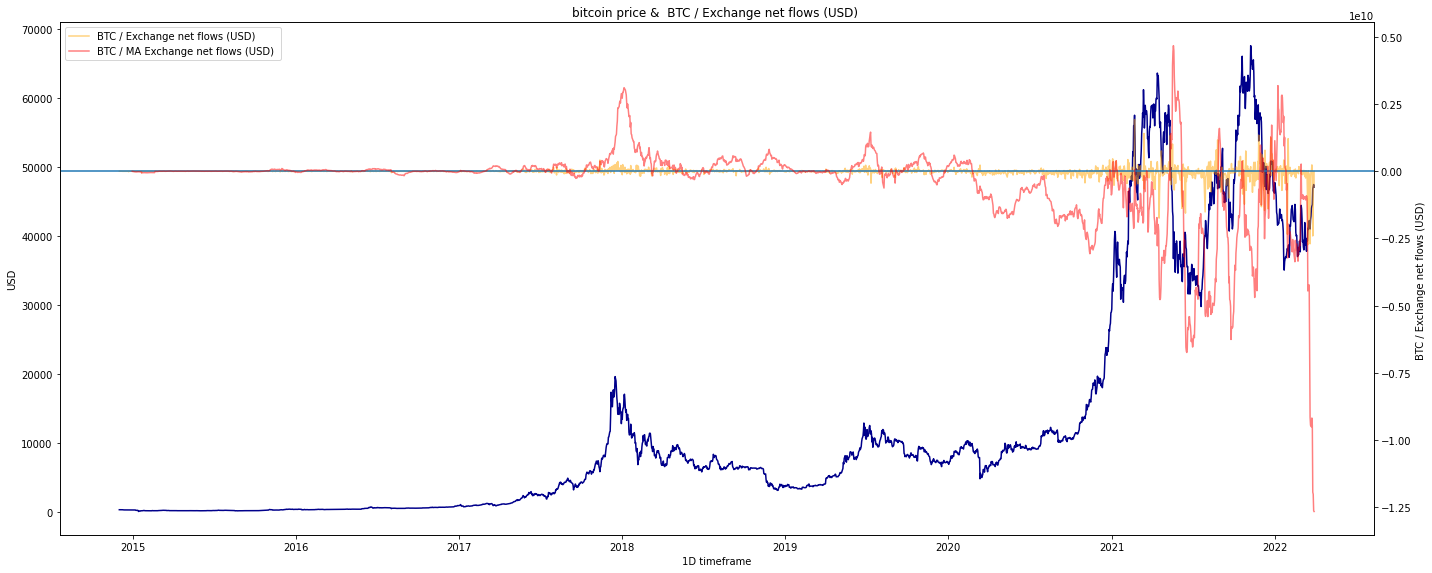

In [ ]:
# plotting the exchange net flows against bitcoin price
fig, ax1 = plt.subplots(figsize=(20,8))
ax1.set_xlabel('1D timeframe')
ax1.set_ylabel('USD')
ax1.plot(btc_merged['Time'], btc_merged['BTC_price'], color='darkblue',label='BTC price')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('BTC / Exchange net flows (USD) ') 
ax2.plot(btc_merged['Time'], btc_merged['BTC / Exchange net flows (USD) '], color='orange', alpha=0.5,label='BTC / Exchange net flows (USD) ')
ax2.axhline(y=0)
# plotting also the 30 days moving average of the exchange net flows to smooth out the curve
ax2.plot(btc_merged['Time'], btc_merged['BTC / Exchange net flows (USD) '].rolling(window=30).sum(), color='red', alpha=0.5,label='BTC / MA Exchange net flows (USD) ')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('bitcoin price &  BTC / Exchange net flows (USD) ')
plt.legend()
plt.show()

In [ ]:
# let's create a feature that gives the daily price range
btc_merged['BTC_daily_price_range'] = np.where(btc_merged['BTC_price']-btc_merged['price_open']>0 , btc_merged['price_high']-btc_merged['price_low'] , -(btc_merged['price_high']-btc_merged['price_low']))

In [ ]:
# extracting month, week, day and day of week from Time column
btc_merged['month']=btc_merged['Time'].dt.month
btc_merged['week']=btc_merged['Time'].dt.isocalendar().week
btc_merged['day']=btc_merged['Time'].dt.day
btc_merged['day_of_week']=btc_merged['Time'].dt.day_of_week

In [ ]:
# importing tqdm_notebook which is an IPython/Jupyter Notebook progressbar decorator for iterators
from tqdm.notebook import tqdm

# calculating moving averages and rolling standard deviations for the following columns
feats_to_MA = ['BTC / Realized Market Cap (USD)',
       'BTC / Free Float MVRV (Free Float Market Cap / Realized Market Cap)',
       'BTC / MVRV (Market Cap / Realized Market Cap)',
       'BTC / Coinbase Issuance (native units)',
       'BTC / Coinbase Issuance (USD)', 'BTC / 1 Day Active Supply',
       'BTC / Value in Top 100 Addrs (native units)',
       'BTC / NDF (Network Distribution Factor)',
       'BTC / Val in Addrs w/ Bal ≥ 1M (native units)',
       'BTC / Val in Addrs w/ Bal ≥ 100K (native units)',
       'BTC / Val in Addrs w/ Bal ≥ 10K (native units)',
       'BTC / Val in Addrs w/ Bal ≥ 1K (native units)',
       'BTC / Val in Addrs w/ Bal ≥ 100 (native units)',
       'BTC / Val in Addrs w/ Bal ≥ $10M USD',
       'BTC / Val in Addrs w/ Bal ≥ $1M USD', 'BTC / Tx Cnt',
       'BTC / Mean Tx Size (native units)',
       'BTC / Miner Revenue per Hash (USD)', 'BTC / Free Float NVT',
       'BTC / Exchange Deposits (USD)', 'BTC / NVT', 'BTC / Mean Hash Rate',
       'BTC / Difficulty', 'BTC / Exchange Withdrawals (USD)',
       'BTC / Daily Inflation Rate', 'BTC / Miner Revenue (USD)', 'price_open',
       'price_high', 'price_low', 'volume', 'candle_usd_volume',
       'candle_trades_count', 'BTC / Exchange net flows (USD) ', 'BTC_daily_price_range','BTC_price']

windows = [7, 14, 21]

for column in tqdm(feats_to_MA):
  for window in windows:
    btc_merged[f'{column}_MA{window}']=btc_merged[column].rolling(window=window).mean()
    btc_merged[f'{column}_roll_std{window}']=btc_merged[column].rolling(window).std()
    # calculating the difference between bitcoin price and it's moving averages
    if column=='BTC_price':
      btc_merged[f'{column}_diff_{column}_MA{window}']=btc_merged[column]-btc_merged[f'{column}_MA{window}']

# removing the data where the moving averages are missing
btc_merged.dropna(inplace=True)

  0%|          | 0/35 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, u

In [ ]:
# calculating the difference between different MA and roll_std values for each feats_to_MA

from itertools import combinations

MA_comb = [list(p) for p in combinations([7,14,21],2)]

for couple in tqdm(MA_comb):
  for column in feats_to_MA:
    btc_merged[f'{column}_diff_MA{couple[0]}_MA{couple[1]}']= btc_merged[f'{column}_MA{couple[0]}']- btc_merged[f'{column}_MA{couple[1]}']
    btc_merged[f'{column}_diff_MA{couple[0]}_MA{couple[1]}']= btc_merged[f'{column}_MA{couple[0]}']- btc_merged[f'{column}_MA{couple[1]}']
    btc_merged[f'{column}_diff_roll_std{couple[0]}_roll_std{couple[1]}']= btc_merged[f'{column}_roll_std{couple[0]}']- btc_merged[f'{column}_roll_std{couple[1]}']

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


In [ ]:
# importing datetime package
import datetime

index_col = ['Time']
# we are going to create lags on the following columns
feats_to_lag = ['BTC / Realized Market Cap (USD)',
       'BTC / Free Float MVRV (Free Float Market Cap / Realized Market Cap)',
       'BTC / MVRV (Market Cap / Realized Market Cap)',
       'BTC / 30 Day Volatility', 'BTC / ROI, 30 Days',
       'BTC / Coinbase Issuance (native units)',
       'BTC / Coinbase Issuance (USD)', 'BTC / 1 Day Active Supply',
       'BTC / 7 Day Active Supply', 'BTC / 30 Day Active Supply',
       'BTC / Value in Top 100 Addrs (native units)',
       'BTC / NDF (Network Distribution Factor)',
       'BTC / Val in Addrs w/ Bal ≥ 1M (native units)',
       'BTC / Val in Addrs w/ Bal ≥ 100K (native units)',
       'BTC / Val in Addrs w/ Bal ≥ 10K (native units)',
       'BTC / Val in Addrs w/ Bal ≥ 1K (native units)',
       'BTC / Val in Addrs w/ Bal ≥ 100 (native units)',
       'BTC / Val in Addrs w/ Bal ≥ $10M USD',
       'BTC / Val in Addrs w/ Bal ≥ $1M USD', 'BTC / Tx Cnt',
       'BTC / Mean Tx Size (native units)',
       'BTC / Miner Revenue per Hash (USD)', 'BTC / Free Float NVT',
       'BTC / Exchange Deposits (USD)', 'BTC / NVT', 'BTC / Mean Hash Rate',
       'BTC / Difficulty', 'BTC / Exchange Withdrawals (USD)',
       'BTC / Daily Inflation Rate', 'BTC / Miner Revenue (USD)', 'price_open',
       'price_high', 'price_low', 'volume', 'candle_usd_volume',
       'candle_trades_count', 'BTC / Exchange net flows (USD) ', 'BTC_daily_price_range','BTC_price']
# let's set different days shift ranges we want to introduce 
shift_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for day_shift in tqdm(shift_range):
    btc_merged_shift = btc_merged[index_col + feats_to_lag].copy()
    
    btc_merged_shift['Time'] = btc_merged_shift['Time'].apply(lambda x: x + datetime.timedelta(days=day_shift))
    
    foo = lambda x: '{}_lag_{}'.format(x, day_shift) if x in feats_to_lag else x
    btc_merged_shift = btc_merged_shift.rename(columns=foo)

    btc_merged = pd.merge(btc_merged, btc_merged_shift, on=index_col, how='left').fillna(0)

del btc_merged_shift

# removing the data where the lagged values are null
btc_merged=btc_merged[btc_merged['Time']>btc_merged['Time'].min() + datetime.timedelta(days=max(shift_range))]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
# 'price_close' column is our target so let's put it putting as the last column in btc_merged dataframe
target = btc_merged.pop('BTC_price')
btc_merged['BTC_price']=target

In [ ]:
from google.colab import files

btc_merged.to_csv("btc_final.csv")
files.download("btc_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>